# REPORT: DATA ANALYSIS ON DIFFERENT USAGE FOR MOBILE HEALTH APPS


## INTRODUCTION

The proliferation of mobile phones with app capabilities, combined with growing requirements of patient-consumers' roles in handling their care, presents a once-in-a-lifetime opportunity to use mobile health (mHealth) apps.

#### The dataset used for this project was collected from a survey done on mHealth app users from Japanese population

#### For this project, we are trying to do and achieve the following:
1.	To analyse and identify the features and characteristics most valued by App users that influence their rating and choice of app.
2.	Which demographical factors—gender, age, prefecture, region, occupation, marital status, and number of children, OS type, app purpose, user experience—interactive, entertaining, performance, ease of use, navigation, layout, graphics, visual appeal, visual information, quality of information, credibility as well as privacy issues—confidentiality and privacy, ethics, and rating are associated with the use of a particular category of mobile health apps?
3. Finally, we will be making predictions about the user ratings of mhealth apps, if app users would recommend the apps to other users and stakeholders, and if app users would pay for the apps or would rather use free apps. 

#### Ultimately, we are trying to use data to answer the question of why app users would choose a particular category of apps to download and use.

## Importing the Neccessary Libraries

In [194]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import time
pd.set_option("display.max_columns",None)
pd.set_option("min_rows",500)

In [195]:
from functools import reduce
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from numpy import mean
from numpy import std
from sklearn.svm import SVC
import folium
import branca
import branca.colormap as cm
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot


## Load the Dataset(CSV File)

Now, we would create a function to load the data

In [196]:
#create a function to load the data
def load_data(url,encoding):
    mhealth = pd.read_csv(url,encoding='latin1')
    return mhealth

In [197]:
mhealth = load_data('mHealth dataset.csv',encoding = 'latin1')

In [198]:
mhealth

,App ID,Date,Gender,Age,Age Band,Prefecture,Region,Job,Marital Status,Kids,IOS,Android,Windows,Not Downloaded,Purpose,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Graphics,Visual Appeal,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App,Pay for App
0,1000002570,08/06/2022 20:58,2,56,6,14,3,8,2,1,0,1,0,0,4,3,4,4,4,2,3,4,3,3,3,4,3,3,3,3,3
1,1000003695,08/06/2022 22:17,1,64,7,13,3,6,2,1,0,0,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1000004117,08/06/2022 19:30,2,54,6,13,3,9,2,1,0,1,0,0,2,4,2,3,2,2,2,2,2,2,2,2,3,3,2,2,3
3,1000008551,08/06/2022 20:08,2,60,7,27,5,4,1,2,1,0,0,0,2,3,3,3,2,2,2,3,2,2,4,3,3,3,3,3,3
4,1000009247,08/06/2022 19:17,1,73,7,22,4,2,1,1,1,0,0,0,6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,1000009324,08/06/2022 19:15,2,60,7,23,4,6,2,1,0,1,0,0,2,3,1,3,2,2,2,3,2,3,3,3,3,3,3,2,3
6,1000013938,08/06/2022 19:06,1,68,7,22,4,11,2,1,0,1,0,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3
7,1000014003,08/06/2022 19:53,2,65,7,14,3,8,2,1,0,1,0,0,1,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3
8,1000015748,08/06/2022 20:35,1,55,6,13,3,5,2,1,0,1,0,0,3,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,3
9,1000015956,08/06/2022 19:24,1,47,5,14,3,4,2,1,0,1,0,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Next step is to create a function to do exploratory data analysis, which includes; to check the statistical information on the data, check the shape of the data, list the columns, and check for the missing entries

In [199]:
#create a function to do exploratory data analysis
def EDA(df):
    info = df.info()
    shape = df.shape
    columns = df.columns
    missing = df.isna().sum()
    return info,shape,columns,missing

In [200]:
#call the function
EDA(mhealth)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   App ID                       632 non-null    int64 
 1   Date                         632 non-null    object
 2   Gender                       632 non-null    int64 
 3   Age                          632 non-null    int64 
 4   Age Band                     632 non-null    int64 
 5   Prefecture                   632 non-null    int64 
 6   Region                       632 non-null    int64 
 7   Job                          632 non-null    int64 
 8   Marital Status               632 non-null    int64 
 9   Kids                         632 non-null    int64 
 10  IOS                          632 non-null    int64 
 11  Android                      632 non-null    int64 
 12  Windows                      632 non-null    int64 
 13  Not Downloaded               632 no

(None,
 (632, 31),
 Index(['App ID', 'Date', 'Gender', 'Age', 'Age Band', 'Prefecture', 'Region',
        'Job', 'Marital Status', 'Kids', 'IOS', 'Android', 'Windows',
        'Not Downloaded', 'Purpose', 'Interactive', 'Entertaining',
        'Performance', 'Ease of Use', 'Navigation', 'Layout', 'Graphics',
        'Visual Appeal', 'Visual Information', 'Quality of Information',
        'Credibility', 'Confidentiality and Privacy', 'Ethical', 'Rating',
        'Recommend App', 'Pay for App'],
       dtype='object'),
 App ID                         0
 Date                           0
 Gender                         0
 Age                            0
 Age Band                       0
 Prefecture                     0
 Region                         0
 Job                            0
 Marital Status                 0
 Kids                           0
 IOS                            0
 Android                        0
 Windows                        0
 Not Downloaded                 0
 

The dataset contains 632 rows and 31 columns. It has 30 categorical variables and 1 String variables. The date variable is in a wrong format, so we have to convert this to the correct format. The data has no missing values

## Analysing with Pandas Profiling

Now we would use pandas profiling as an exploratory data analysis tool to help get early insights from the data

In [201]:
# !pip install pandas-profiling
# from pandas_profiling import ProfileReport

In [202]:
# #use pandas profiling to get early insights from the data before cleaning
# prof=ProfileReport(mhealth)
# prof.to_file("mhealth.html")

Now let us try and visualise the missing values(if any) by using a heat map

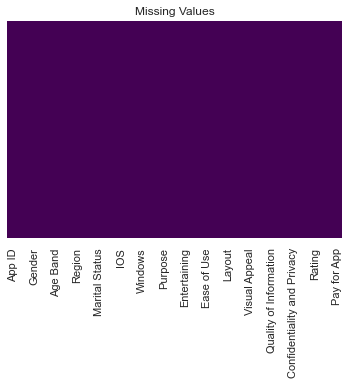

In [203]:
# missing values
sns.heatmap(mhealth.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values');

There are no missing values in the dataset as I could vizualise with a heatmap. If there were missing values there would be some yellow points in the dataset

Next, we check for the statistical description of the dataset

In [204]:
#statistical description of the dataset
mhealth.describe()

,App ID,Gender,Age,Age Band,Prefecture,Region,Job,Marital Status,Kids,IOS,Android,Windows,Not Downloaded,Purpose,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Graphics,Visual Appeal,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App,Pay for App
count,6.320000e+02,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,1.005548e+09,1.520570,45.316456,5.023734,20.250000,4.140823,6.318038,1.577532,1.492089,0.547468,0.449367,0.028481,0.009494,3.518987,3.177215,2.977848,2.947785,2.765823,2.746835,2.835443,2.901899,2.797468,2.876582,2.901899,2.789557,2.917722,2.920886,2.792722,2.890823,2.781646
std,3.047808e+06,0.499972,14.143744,1.336222,11.066182,1.720791,2.874301,0.494344,0.500333,0.498136,0.497824,0.166474,0.097049,1.853498,0.989767,1.011573,0.903661,0.946544,0.944996,0.929262,0.912944,0.919998,0.876144,0.851881,0.915625,0.851699,0.861249,0.902406,0.891469,0.542733
min,1.000003e+09,1.000000,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.003191e+09,1.000000,33.000000,4.000000,13.000000,3.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,1.005913e+09,2.000000,46.000000,5.000000,16.000000,4.000000,6.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.008002e+09,2.000000,56.000000,6.000000,27.000000,5.000000,9.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,1.010036e+09,2.000000,87.000000,7.000000,47.000000,8.000000,11.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000



### Finding Correlation Between the Features

In [205]:
corr=mhealth.corr()
corr 

,App ID,Gender,Age,Age Band,Prefecture,Region,Job,Marital Status,Kids,IOS,Android,Windows,Not Downloaded,Purpose,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Graphics,Visual Appeal,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App,Pay for App
App ID,1.000000,0.136586,-0.472196,-0.446743,0.078872,0.083691,-0.007363,-0.210642,0.119241,0.203745,-0.146279,-0.086513,0.019457,0.023794,-0.059418,-0.057420,-0.070604,-0.033995,-0.033648,-0.014549,-0.056546,-0.075099,-0.041509,-0.013727,-0.030488,-0.047506,-0.059564,-0.055971,-0.071317,-0.120708
Gender,0.136586,1.000000,-0.267388,-0.260485,0.011959,0.017811,0.301464,0.006361,0.013322,0.145609,-0.113602,-0.045131,-0.004031,0.041476,0.037457,0.019703,-0.044973,-0.013247,-0.066108,-0.050691,-0.019876,-0.035719,-0.048463,-0.013859,-0.013031,-0.022071,-0.010936,-0.055517,-0.000287,0.039940
Age,-0.472196,-0.267388,1.000000,0.968208,-0.036127,-0.033870,0.040791,0.376143,-0.370727,-0.261936,0.174688,0.132126,-0.046066,0.053936,0.031421,0.039813,0.075567,0.020815,0.023671,0.024949,0.079853,0.079957,0.061857,0.021390,0.023874,0.076233,0.103927,0.045253,0.053146,0.108732
Age Band,-0.446743,-0.260485,0.968208,1.000000,-0.029232,-0.029025,0.009173,0.377480,-0.373066,-0.262406,0.191211,0.089573,-0.038403,0.068605,0.038755,0.033218,0.070588,0.010666,0.021082,0.021019,0.060372,0.067085,0.051239,0.014579,0.017042,0.061598,0.084260,0.036944,0.040761,0.101124
Prefecture,0.078872,0.011959,-0.036127,-0.029232,1.000000,0.977686,-0.022483,-0.034257,0.017818,0.016243,-0.009493,-0.015915,0.027300,0.032528,-0.026912,-0.012387,-0.042591,0.021182,0.026975,0.009863,0.004314,0.008406,-0.001389,-0.004623,0.015993,-0.004204,-0.013386,-0.011625,-0.009759,-0.018867
Region,0.083691,0.017811,-0.033870,-0.029025,0.977686,1.000000,-0.012914,-0.051047,0.035349,0.006055,0.000012,-0.019555,0.010961,0.029222,-0.048173,-0.023697,-0.057432,0.004711,0.006366,-0.011253,-0.020447,-0.009985,-0.029449,-0.022994,-0.005301,-0.027765,-0.034175,-0.028119,-0.026120,-0.019627
Job,-0.007363,0.301464,0.040791,0.009173,-0.022483,-0.012914,1.000000,-0.036900,0.002303,-0.078632,0.053912,0.007536,-0.010841,0.107293,0.097141,0.073829,0.046063,0.064698,0.032607,0.070652,0.065055,0.073541,0.084835,0.065188,0.026676,0.066380,0.074840,0.042564,0.057485,0.114684
Marital Status,-0.210642,0.006361,0.376143,0.377480,-0.034257,-0.051047,-0.036900,1.000000,-0.670294,-0.101851,0.083594,0.069411,0.017667,0.016552,-0.054038,-0.066282,-0.017530,-0.039035,-0.018980,-0.003232,-0.021747,-0.014203,0.022128,-0.015779,-0.018166,0.045288,0.006985,-0.015430,-0.011329,-0.007683
Kids,0.119241,0.013322,-0.370727,-0.373066,0.017818,0.035349,0.002303,-0.670294,1.000000,0.042840,-0.017517,-0.111451,-0.063726,-0.021199,0.073240,0.049753,-0.006173,-0.000572,-0.017650,-0.016439,-0.025988,-0.031030,-0.049229,-0.009260,0.011927,-0.046158,-0.008810,-0.008903,0.003390,-0.023880
IOS,0.203745,0.145609,-0.261936,-0.262406,0.016243,0.006055,-0.078632,-0.101851,0.042840,1.000000,-0.923332,-0.130993,-0.042118,-0.055904,-0.062089,-0.051376,-0.091302,-0.053693,-0.058596,-0.096078,-0.083834,-0.082731,-0.066441,-0.033824,-0.066666,-0.046811,-0.065112,-0.064452,-0.050764,-0.020220


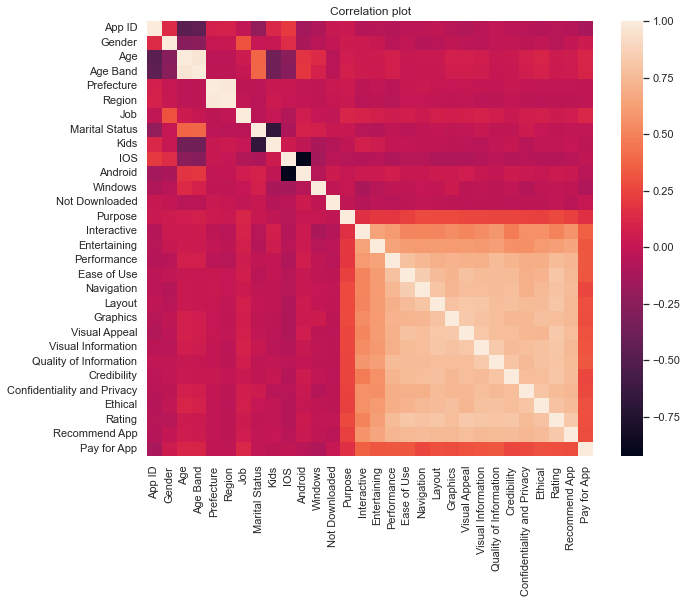

In [206]:
plt.rcParams["figure.figsize"] = [10 , 8]
plt.title('Correlation plot')
sns.heatmap(mhealth.corr())
plt.show()

#### Highly correlated Features

Quality of Information vs Visual Information : 0.830959

Visual Appeal vs Graphics : 0.825394

Recommend App vs Rating : 0.822857

Visual Appeal vs Rating : 0.825394

Highly Negatively Correlated Features

Android vs IOS : -0.923332

In [207]:
mhealth.drop('Date',inplace=True,axis=1)

In [208]:
mhealth.head(5)

,App ID,Gender,Age,Age Band,Prefecture,Region,Job,Marital Status,Kids,IOS,Android,Windows,Not Downloaded,Purpose,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Graphics,Visual Appeal,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App,Pay for App
0,1000002570,2,56,6,14,3,8,2,1,0,1,0,0,4,3,4,4,4,2,3,4,3,3,3,4,3,3,3,3,3
1,1000003695,1,64,7,13,3,6,2,1,0,0,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1000004117,2,54,6,13,3,9,2,1,0,1,0,0,2,4,2,3,2,2,2,2,2,2,2,2,3,3,2,2,3
3,1000008551,2,60,7,27,5,4,1,2,1,0,0,0,2,3,3,3,2,2,2,3,2,2,4,3,3,3,3,3,3
4,1000009247,1,73,7,22,4,2,1,1,1,0,0,0,6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


## VISUALIZING THE DATA

### Changing Numerical Data types to Categorical Data Types

In [209]:
mhealth.dtypes

App ID                         int64
Gender                         int64
Age                            int64
Age Band                       int64
Prefecture                     int64
Region                         int64
Job                            int64
Marital Status                 int64
Kids                           int64
IOS                            int64
Android                        int64
Windows                        int64
Not Downloaded                 int64
Purpose                        int64
Interactive                    int64
Entertaining                   int64
Performance                    int64
Ease of Use                    int64
Navigation                     int64
Layout                         int64
Graphics                       int64
Visual Appeal                  int64
Visual Information             int64
Quality of Information         int64
Credibility                    int64
Confidentiality and Privacy    int64
Ethical                        int64
R

In [210]:
mhealth['Gender'] = mhealth['Gender'].astype('category')
mhealth['Age'] = mhealth['Age'].astype('category')
mhealth['Age Band'] = mhealth['Age Band'].astype('category')
mhealth['Prefecture'] = mhealth['Prefecture'].astype('category')
mhealth['Region'] = mhealth['Region'].astype('category')
mhealth['Job'] = mhealth['Job'].astype('category')
mhealth['Marital Status'] = mhealth['Marital Status'].astype('category')
mhealth['Kids'] = mhealth['Kids'].astype('category')
mhealth['IOS'] = mhealth['IOS'].astype('category')
mhealth['Android'] = mhealth['Android'].astype('category')
mhealth['Windows'] = mhealth['Windows'].astype('category')
mhealth['Not Downloaded'] = mhealth['Not Downloaded'].astype('category')
mhealth['Purpose'] = mhealth['Purpose'].astype('category')
mhealth['Interactive'] = mhealth['Interactive'].astype('category')
mhealth['Entertaining'] = mhealth['Entertaining'].astype('category')
mhealth['Performance'] = mhealth['Performance'].astype('category')
mhealth['Ease of Use'] = mhealth['Ease of Use'].astype('category')
mhealth['Navigation'] = mhealth['Navigation'].astype('category')
mhealth['Layout'] = mhealth['Layout'].astype('category')
mhealth['Graphics'] = mhealth['Graphics'].astype('category')
mhealth['Visual Appeal'] = mhealth['Visual Appeal'].astype('category')
mhealth['Visual Information'] = mhealth['Visual Information'].astype('category')
mhealth['Quality of Information'] = mhealth['Quality of Information'].astype('category')
mhealth['Credibility'] = mhealth['Credibility'].astype('category')
mhealth['Confidentiality and Privacy'] = mhealth['Confidentiality and Privacy'].astype('category')
mhealth['Ethical'] = mhealth['Ethical'].astype('category')
mhealth['Rating'] = mhealth['Rating'].astype('category')
mhealth['Recommend App'] = mhealth['Recommend App'].astype('category')
mhealth['Pay for App'] = mhealth['Pay for App'].astype('category')

We had to convert to categorical data types to aid visualisations.

In [211]:
mhealth.dtypes

App ID                            int64
Gender                         category
Age                            category
Age Band                       category
Prefecture                     category
Region                         category
Job                            category
Marital Status                 category
Kids                           category
IOS                            category
Android                        category
Windows                        category
Not Downloaded                 category
Purpose                        category
Interactive                    category
Entertaining                   category
Performance                    category
Ease of Use                    category
Navigation                     category
Layout                         category
Graphics                       category
Visual Appeal                  category
Visual Information             category
Quality of Information         category
Credibility                    category


### Demographic Statistical Analysis

### Univariate Analysis

We create a function to build univariate count plots

In [212]:
#function to build univariate plots
# sns.set(style="darkgrid")
def plot(data,var,color,label,xticks):
    plt.figure(figsize=(5,5))
    plot = sns.countplot(x=var,data=data,color=color)
    plot.set(xlabel=var, ylabel='Users')
#     plt.xlabel(size=15)
#     plt.ylabel(size=20)
    for p in plot.patches: 
        height = p.get_height() 
        plot.text(p.get_x()+p.get_width()/2., 
        height + 3, 
        '{:1.2f}'.format((height/len(data))*100)+'%',  
        ha="center") 
    plot.set(xticklabels=label)
    plot.set(xlabel=var)
    plot.set(ylabel='Users')
    plt.xticks(rotation=xticks)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()


#### Gender

In [213]:
mhealth['Gender'].value_counts()

2    329
1    303
Name: Gender, dtype: int64

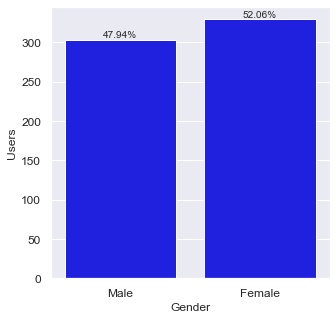

In [214]:
gender = plot(mhealth,'Gender',color='blue',label=('Male','Female'),xticks=0)

The above plot shows that there are more female mobile health app users with 52.09% of the users as females, while 47.94% users are males

In [215]:
G = mhealth["Gender"].value_counts().to_frame().reset_index()
G.columns = ["gender", "users"]
G = G.sort_values(by = "users",ascending=True)
G

,gender,users
1,1,303
0,2,329


In [216]:
G['gender']= G['gender'].replace(1,'Male')
G['gender']= G['gender'].replace(2,'Female')

In [217]:
import plotly.express as px
fig = px.funnel(G, x='users', y='gender')
fig.show()

#### Age Band

In [218]:
mhealth['Age Band'].value_counts()

5    159
6    145
4    120
7    103
3     99
2      6
Name: Age Band, dtype: int64

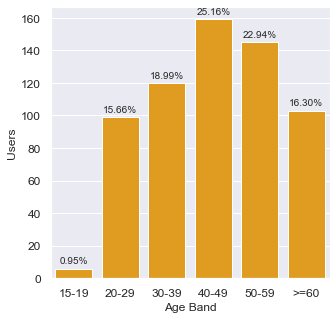

In [219]:
age_band = plot(mhealth,'Age Band',color='orange',label=('15-19','20-29','30-39','40-49','50-59','>=60'),xticks=0)

Patients between the ages of 40 and 59 years use mobile health more than other age categories, with teenagers making up the least users

Below is a breakdown of the percentage of users for each age category:

40-49 : 25.16% of users

50-59 : 22.94% of users

30-39 : 18.99% of users

'>=60' : 16.30% of users

20-29 : 15.66% of users

15-19 : 0.95% of users


#### Age Pyramid for the Mhealth App Users

In [220]:
male=mhealth.query("Gender == 1") #segment the gender column to get the males
female=mhealth.query("Gender == 2") #segment the gender column to get the females

In [221]:
# male['Age'] #age of males

In [222]:
# female['Age'] #age of females

In [223]:
#to get the age pyramid of the male population
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0


for m in male['Age']:
    if m <= 9:
        one +=1
    elif m >= 10 and m <= 19:
        ten += 1
    elif m >= 20 and m <= 29:
        twenty += 1
    elif m >= 30 and m <= 39:
        thirty += 1
    elif m >= 40 and m <= 49:
        fourty += 1
    elif m >= 50 and m <= 59:
        fifty += 1
    elif m >= 60 and m <= 69:
        sixty += 1
    elif m >= 70 and m <= 79:
        seventy += 1
    elif m >= 80 and m <= 89:
        eighty += 1
    
male_d = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty]
male_d = [(-1)*m for m in male_d]
male_d.reverse()
male_d

[-1, -19, -44, -90, -77, -45, -25, -2, 0]

In [224]:
#to get the age pyramid of the female population
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0


for f in female['Age']:
    if f <= 9:
        one +=1
    elif f >= 10 and f <= 19:
        ten += 1
    elif f >= 20 and f <= 29:
        twenty += 1
    elif f >= 30 and f <= 39:
        thirty += 1
    elif f >= 40 and f <= 49:
        fourty += 1
    elif f >= 50 and f <= 59:
        fifty += 1
    elif f >= 60 and f <= 69:
        sixty += 1
    elif f >= 70 and f <= 79:
        seventy += 1
    elif f >= 80 and f <= 89:
        eighty += 1
    
female_d = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty]
female_d.reverse()
female_d

[0, 9, 30, 55, 82, 75, 74, 4, 0]

In [225]:
age_p =pd.DataFrame({'Male':male_d, 'Female':female_d, 'Age':['89-80','79 - 70','69 - 60','59 - 50', '49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']})

order =['89-80','79 - 70','69 - 60','59 - 50','49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']

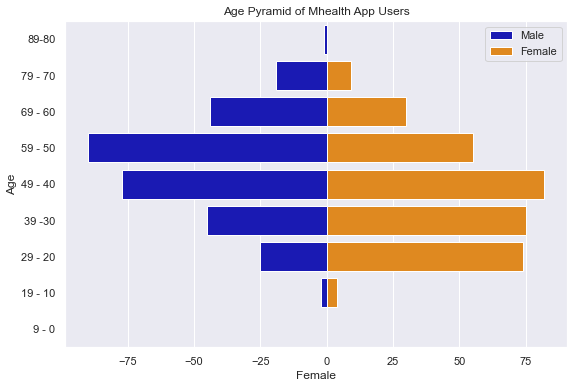

In [226]:
plt.figure(figsize=(9,6))
age_pyramid = sns.barplot(data=age_p, x='Male', y = 'Age', label = 'Male', color = 'mediumblue', order = order)
age_pyramid = sns.barplot(data=age_p,x = 'Female', y ='Age', color = ('darkorange'), label = 'Female', order = order)
age_pyramid.legend()
plt.title('Age Pyramid of Mhealth App Users')
plt.show()

At a younger age more females use the mhealth apps, but as the age tends to increase there are more males than females that use the apps

#### Region

In [227]:
mhealth['Region'].value_counts()

3    247
5    131
4     93
8     57
6     40
2     29
1     25
7     10
Name: Region, dtype: int64

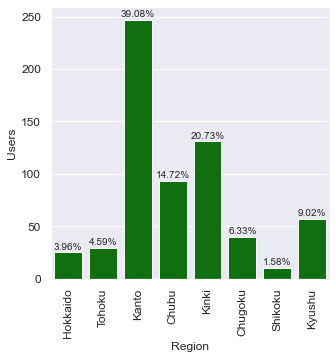

In [228]:
region = plot(mhealth,'Region',color='green',label=('Hokkaido','Tohoku','Kanto','Chubu','Kinki','Chugoku','Shikoku','Kyushu'),xticks=90)

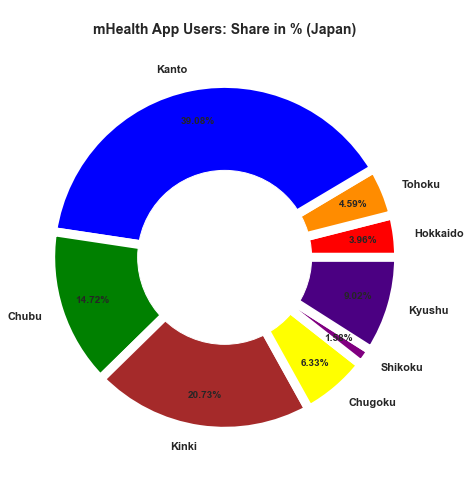

In [229]:
# assign the data
kanto   = mhealth['Region'].value_counts()[0]
kinki   = mhealth['Region'].value_counts()[1]
chubu   = mhealth['Region'].value_counts()[2]
kyushu   = mhealth['Region'].value_counts()[3]
chugoku   = mhealth['Region'].value_counts()[4]
tohoku   = mhealth['Region'].value_counts()[5]
hokkaido   = mhealth['Region'].value_counts()[6]
shikoku   = mhealth['Region'].value_counts()[7]


names = ['Hokkaido','Tohoku','Kanto','Chubu','Kinki','Chugoku','Shikoku','Kyushu']
size  = [hokkaido,tohoku,kanto,chubu,kinki,chugoku,shikoku,kyushu]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=['Hokkaido','Tohoku','Kanto','Chubu','Kinki','Chugoku','Shikoku','Kyushu'], colors=['red', 'darkorange', 'blue','green','brown','yellow','purple','indigo'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':9, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.5, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nmHealth App Users: Share in % (Japan)', fontsize=14, fontweight='bold')

plt.show();

There are 8 regions in Japan. The donut chart above shows that Kanto has the highest number of mHealth app users with 39.08%, closely followed by Kinki with 20.73% of users

#### Job

In [230]:
mhealth['Job'].value_counts()

9     101
3      99
5      98
8      94
4      78
11     62
6      33
10     25
1      21
2      13
7       8
Name: Job, dtype: int64

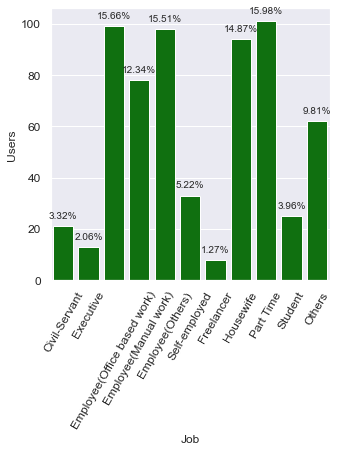

In [231]:
job = plot(mhealth,'Job',color='green',label=('Civil-Servant','Executive','Employee(Office based work)','Employee(Manual work)','Employee(Others)','Self-employed','Freelancer','Housewife','Part Time','Student','Others'),xticks=60)


Part time workers, office based employees and other employees make up the top mobile health app users with 15.98%,15.66% and 15.51% respectively 

#### Marital Status

In [232]:
mhealth['Marital Status'].value_counts()

2    365
1    267
Name: Marital Status, dtype: int64

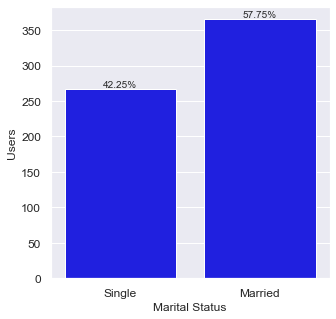

In [233]:
marital_status = plot(mhealth,'Marital Status',color='blue',label=('Single','Married'),xticks=0)

There are more married people than single people that use mobile health apps. 365 people, which makes up 57.75% of the users are married , while 267 people which is 42.25% are single.

#### Kids

In [234]:
mhealth['Kids'].value_counts()

1    321
2    311
Name: Kids, dtype: int64

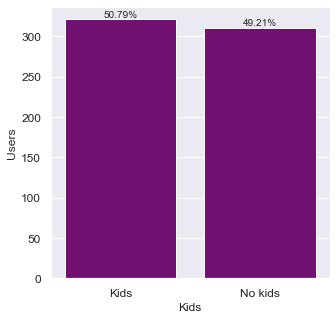

In [235]:
kids = plot(mhealth,'Kids',color='Purple',label=('Kids','No kids'),xticks=0)

Over 50% of the mhealth apps users have kids. This is a total of 321 users, with a slightly less amount with no kids. This is an early indication that this is not a determining factor on the demographics that are likely to use or download a mobile health app

In [236]:
K = mhealth["Kids"].value_counts().to_frame().reset_index()
K.columns = ["Kids", "users"]
K = K.sort_values(by = "users",ascending=True)
K

,Kids,users
1,2,311
0,1,321


In [237]:
K['Kids']= K['Kids'].replace(1,'Kids')
K['Kids']= K['Kids'].replace(2,'No Kids')

In [238]:
fig = px.funnel(K, x='users', y='Kids')
fig.show()

#### Downloaded from IOS

In [239]:
mhealth['IOS'].value_counts()

1    346
0    286
Name: IOS, dtype: int64

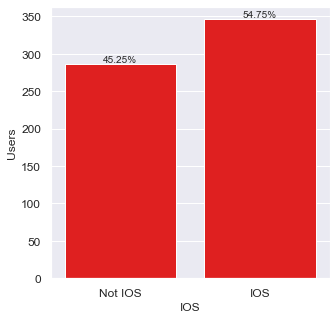

In [240]:
ios = plot(mhealth,'IOS',color='red',label=('Not IOS','IOS'),xticks=0)

In [241]:
mhealth['Windows'].value_counts()

0    614
1     18
Name: Windows, dtype: int64

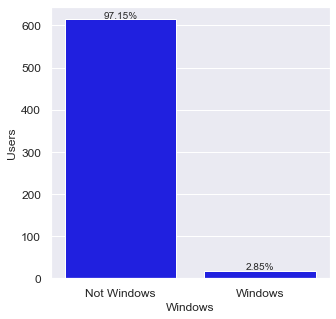

In [242]:
windows = plot(mhealth,'Windows',color='blue',label=('Not Windows','Windows'),xticks=0)

In [243]:
mhealth['Android'].value_counts()

0    348
1    284
Name: Android, dtype: int64

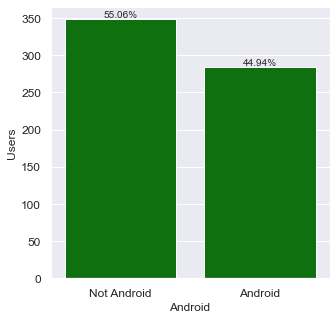

In [244]:
android = plot(mhealth,'Android',color='green',label=('Not Android','Android'),xticks=0)

In [245]:
mhealth['Not Downloaded'].value_counts()

0    626
1      6
Name: Not Downloaded, dtype: int64

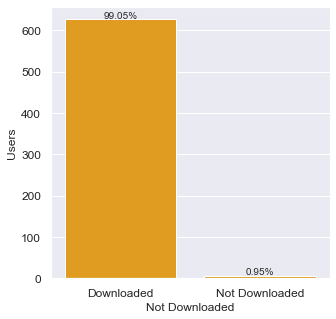

In [246]:
not_downloaded = plot(mhealth,'Not Downloaded',color='orange',label=('Downloaded','Not Downloaded'),xticks=0)

99% of the users downloaded their apps from either google playstore(androids), apple app store(IOS), or windows. 346 users downloaded from IOS, 284 from android, 18 from windows respectively. 

#### Purpose of the Apps

In [247]:
mhealth['Purpose'].value_counts()

6    181
2    142
3    108
1     99
4     79
5     23
Name: Purpose, dtype: int64

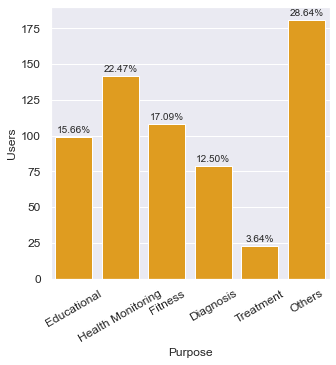

In [248]:
purpose = plot(mhealth,'Purpose',color='orange',label=('Educational','Health Monitoring','Fitness','Diagnosis','Treatment','Others'),xticks=30)

Health monitoring apps dominate the mhealth user apps. This is closely followed by Fitness and Educational apps

In [249]:
P = mhealth["Purpose"].value_counts().to_frame().reset_index()
P.columns = ["Purpose", "Users"]
P = P.sort_values(by = "Users",ascending=True)
P

,Purpose,Users
5,5,23
4,4,79
3,1,99
2,3,108
1,2,142
0,6,181


In [250]:
P['Purpose']= P['Purpose'].replace(1,'Educational')
P['Purpose']= P['Purpose'].replace(2,'Health Monitoring')
P['Purpose']= P['Purpose'].replace(3,'Fitness')
P['Purpose']= P['Purpose'].replace(4,'Diagnosis')
P['Purpose']= P['Purpose'].replace(5,'Treatment')
P['Purpose']= P['Purpose'].replace(6,'Others')

In [251]:
fig = px.funnel(P, x='Users', y='Purpose')
fig.show()

### Bivariate Analysis

We have to do a bivariate analysis to find out the demography that uses a particular type of mhealth app

While the data suggests that age, gender, job, marital status and region are associated with mobile health app use, further analysis suggests that these factors are not uniform across different types of health apps

In [252]:

sns.set(style="darkgrid")
def biv_plot(data,x,hue,label,xticks):
    plt.figure(figsize=(15,8))
    plot = sns.countplot(x=x,hue=hue,data=mhealth)
    plot.set(xlabel=x, ylabel='App Users')
    plt.title(f"Purpose of Apps by {x}")
    plot.set(xticklabels=label)
    plt.legend(labels=['Educational','Health Monitoring','Fitness','Diagnosis','Treatment','Others'])
    plt.xticks(rotation=xticks)
    plt.show()

#### Purpose of Apps by Gender

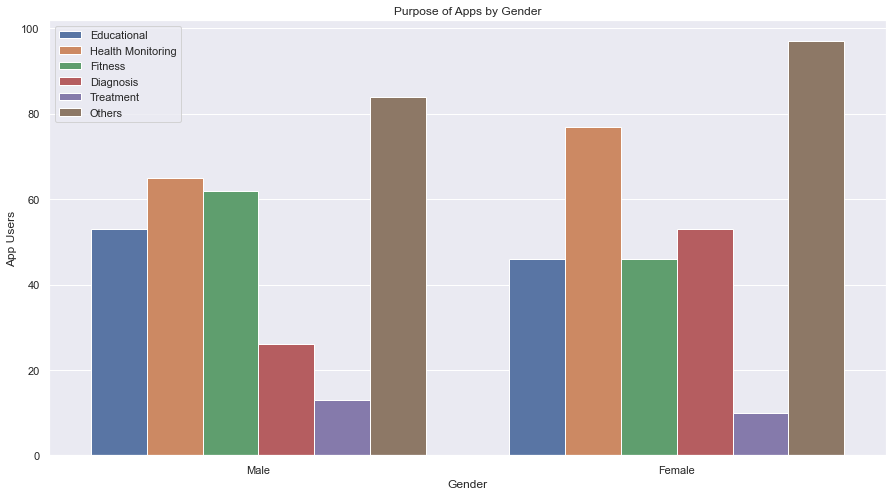

In [253]:
gender_purpose = biv_plot(mhealth,'Gender','Purpose',label=('Male','Female'),xticks=0)

#### Purpose of Apps by Age

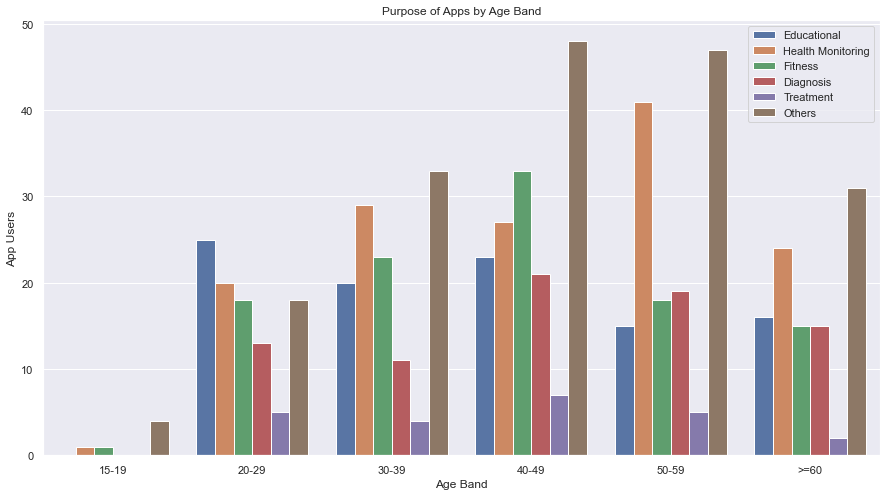

In [254]:
age_purpose = biv_plot(mhealth,'Age Band','Purpose',label=('15-19','20-29','30-39','40-49','50-59','>=60'),xticks=0)

#### Purpose of Apps by Region

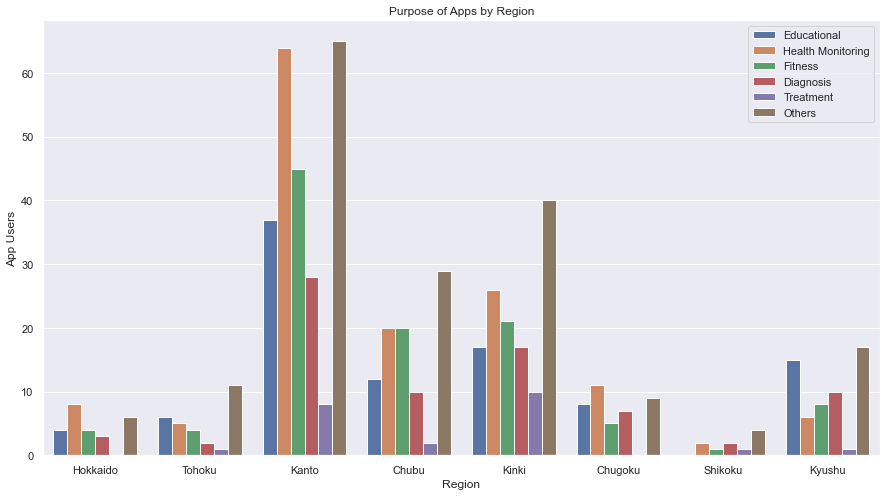

In [255]:
region_purpose = biv_plot(mhealth,'Region','Purpose',label=('Hokkaido','Tohoku','Kanto','Chubu','Kinki','Chugoku','Shikoku','Kyushu'),xticks=0)

Most of the app users are located within the Kanto region and this has a direct effect on the purpose of the apps. Kanto region dominates in all the different types of apps in terms of the apps purpose

#### Purpose of Apps by Jobs

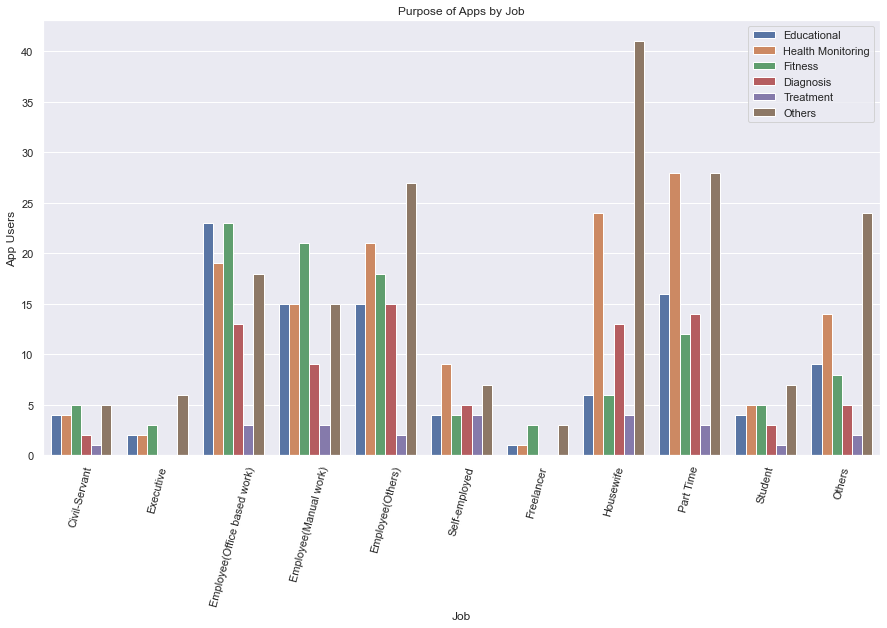

In [256]:
job_purpose = biv_plot(mhealth,'Job','Purpose',label=('Civil-Servant','Executive','Employee(Office based work)','Employee(Manual work)','Employee(Others)','Self-employed','Freelancer','Housewife','Part Time','Student','Others'),xticks=75)

#### Purpose of Apps by Marital Status

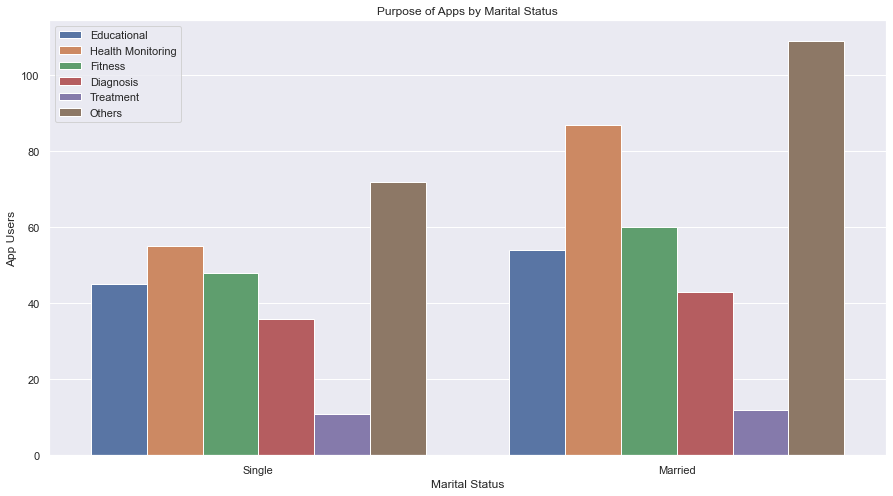

In [257]:
gender_purpose = biv_plot(mhealth,'Marital Status','Purpose',label=('Single','Married'),xticks=0)

In [258]:
sns.set(style="darkgrid")
def purpose_plot(data,x,hue,label,xticks, palette = 'GnBu_d',edgecolor='black',alpha=0.75,linewidth=1):
    plt.figure(figsize=(15,8))
    plot = sns.countplot(x=x,hue=hue,data=mhealth)
    plot.set(xlabel=x, ylabel='App Users')
    plt.title(f"Purpose of Apps by {x}")
    plot.set(xticklabels=label)
    plt.legend(labels=['Educational','Health Monitoring','Fitness','Diagnosis','Treatment','Others'])
    plt.xticks(rotation=xticks)
    for p in plot.patches: 
        height = p.get_height() 
        plot.text(p.get_x()+p.get_width()/2., 
        height + 3, 
        '{:1.2f}'.format((height/len(data))*100)+'%',  
        ha="center")
    plt.show();

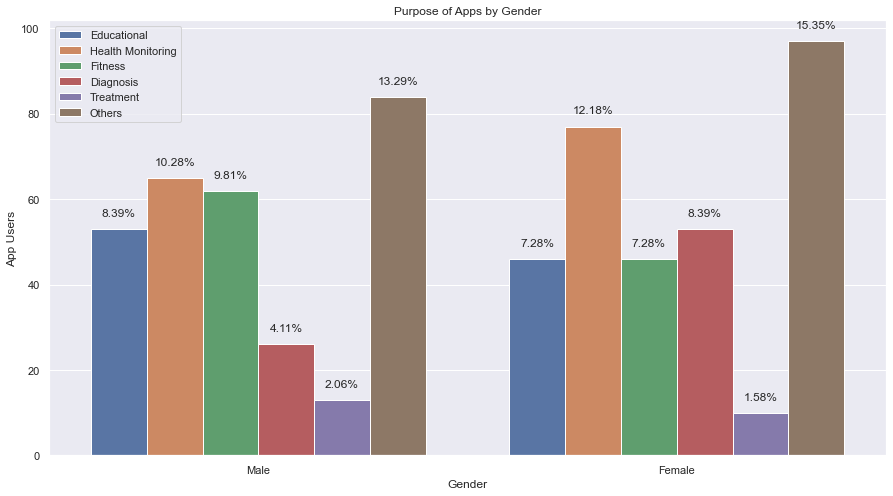

In [259]:
gender_purpose = purpose_plot(mhealth,'Gender','Purpose',label=('Male','Female'),xticks=0)

Men are more likely to use health monitoring apps than any other apps, meanwhile there are more women that use health monitoring apps than men. Men use more fitness apps than women, making up 9.81% as against 7.28% for women. 8.39% of women use diagnosis apps, as against 4.11% of male users

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


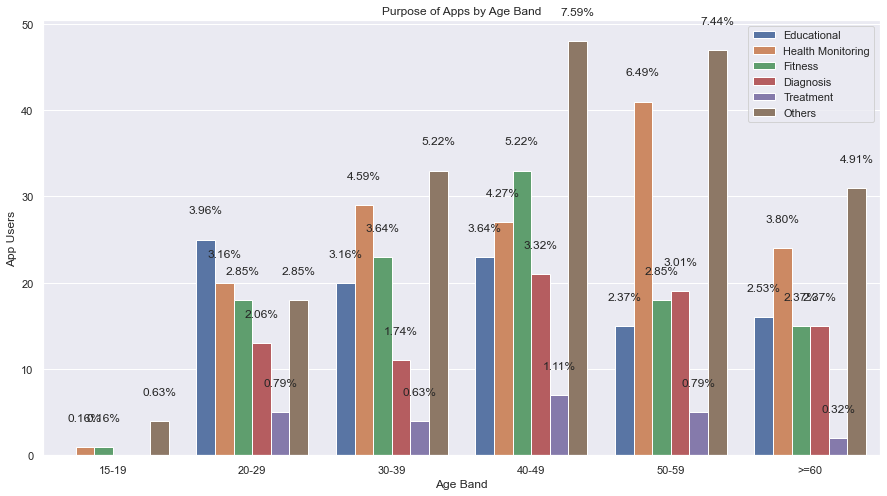

In [260]:
age_purpose = purpose_plot(mhealth,'Age Band','Purpose',label=('15-19','20-29','30-39','40-49','50-59','>=60'),xticks=0)

The dominant age range is 40-49. Users within this age range use more fitness apps, while users within 50-59 use more of health monitoring apps. Educational apps are used by a younger age group of 20-29, while diagnosis apps are used by respondents within age 40-49 and 50-59, likewise treatment apps.

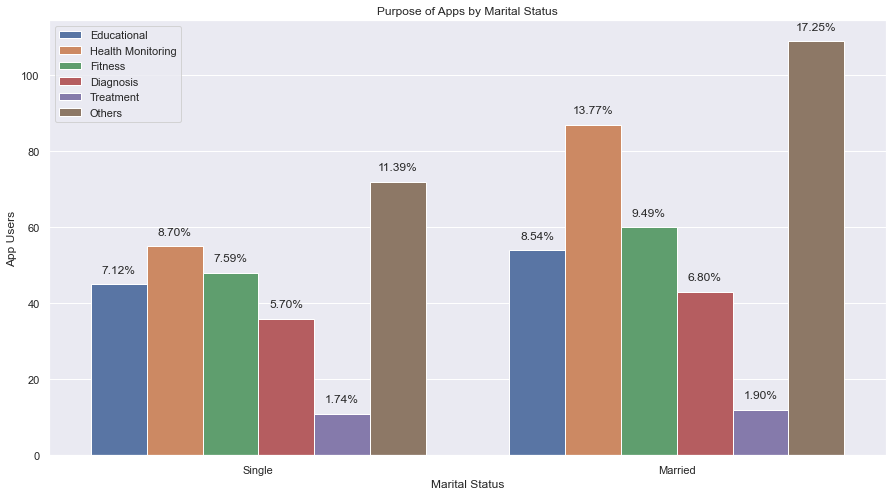

In [261]:
marital_purpose = purpose_plot(mhealth,'Marital Status','Purpose',label=('Single','Married'),xticks=0)

Single people use more of health monitoring apps than any other type of health apps, similarly married people use more health monitoring apps than any other apps. Married people use more health monitoring apps than single people, likewise all the other types of apps

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


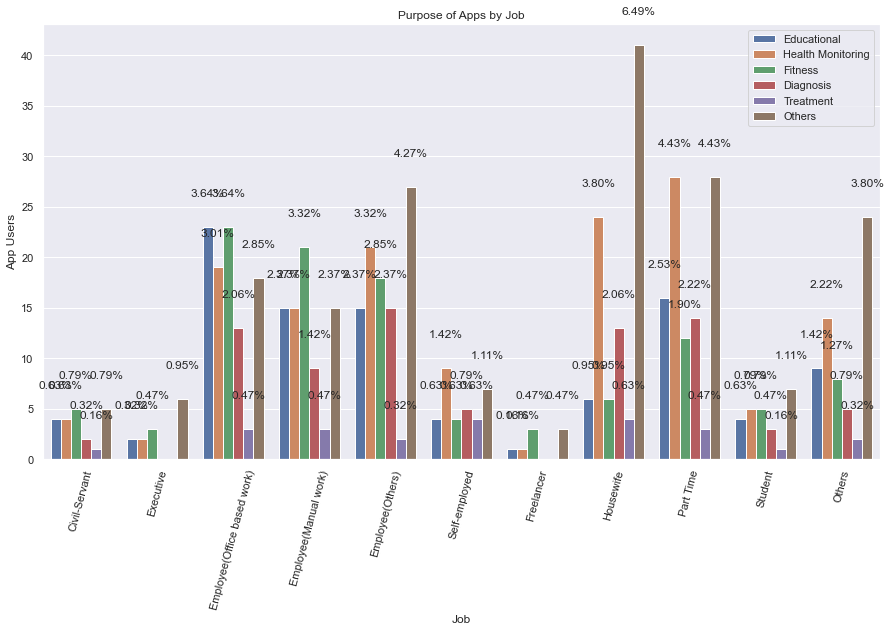

In [262]:
job_purpose = purpose_plot(mhealth,'Job','Purpose',label=('Civil-Servant','Executive','Employee(Office based work)','Employee(Manual work)','Employee(Others)','Self-employed','Freelancer','Housewife','Part Time','Student','Others'),xticks=75)

There are more gainfully employed users (either office based work or manual work). This demography use more of fitness apps than any other apps. Second on the list are educational apps.

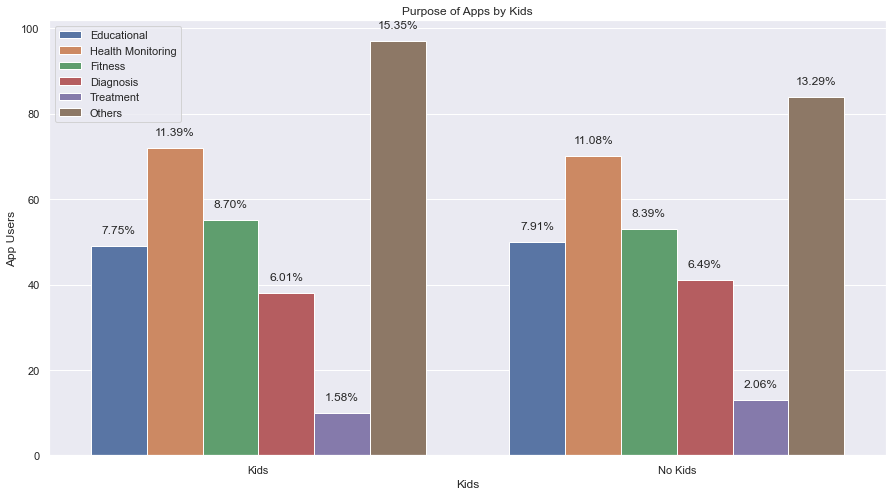

In [263]:
kids_purpose = purpose_plot(mhealth,'Kids','Purpose',label=('Kids','No Kids'),xticks=0)

## User Experience Analysis

### App Engagement

#### Is the App Interactive?

In [264]:
mhealth['Interactive'].value_counts()

3    306
4    129
2     93
5     71
1     33
Name: Interactive, dtype: int64

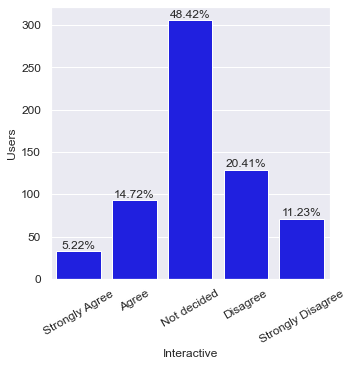

In [265]:
interactive = plot(mhealth,'Interactive',color='blue',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

Majority of the app users are undecided if the app is interactive or engaging. This is closely followed by those that think the app is not entirely interactive, which makes up 20.41% of the users.Only 5.22% of the mhealth app users think that the app is generally very interactive.

#### Is the App Entertaining?

In [266]:
mhealth['Entertaining'].value_counts()

3    280
2    154
4    100
5     59
1     39
Name: Entertaining, dtype: int64

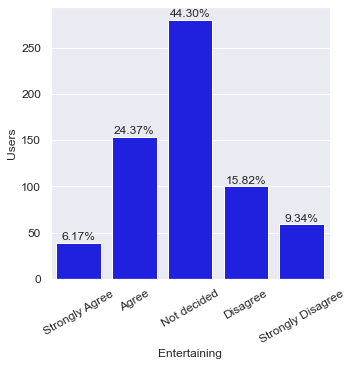

In [267]:
entertaining = plot(mhealth,'Entertaining',color='blue',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

44.30% of the app users are yet to decide if the app is entertaining or not, while 24.37% of the users agree that the app is entertaining. But only slightly over 6% strongly agree that the apps are entertaining

### App Functionality

#### Does the App perform well? 

In [268]:
mhealth['Performance'].value_counts()

3    346
2    130
4     79
5     43
1     34
Name: Performance, dtype: int64

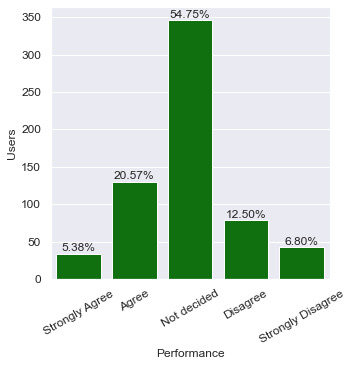

In [269]:
performance = plot(mhealth,'Performance',color='green',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

Almost 55% of the app users are undecided on the performance of the apps. 20.57% agree that the apps have good performance. 12.5% feels that the apps performs poorly, while 6.8% agrees that the apps perform extremely poorly

#### Are the Apps Easy to Use?

In [270]:
mhealth['Ease of Use'].value_counts()

3    278
2    210
4     62
1     41
5     41
Name: Ease of Use, dtype: int64

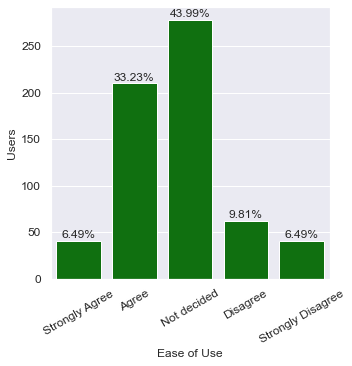

In [271]:
easy_to_use = plot(mhealth,'Ease of Use',color='green',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

The above plot shows that the end users(patients) would pick an app because of how easy it is to use. From the above, 33.23% of the app users agree that the apps are easy to use

#### Is It Easy to Navigate the Apps?

In [272]:
mhealth['Navigation'].value_counts()

3    283
2    209
4     55
1     44
5     41
Name: Navigation, dtype: int64

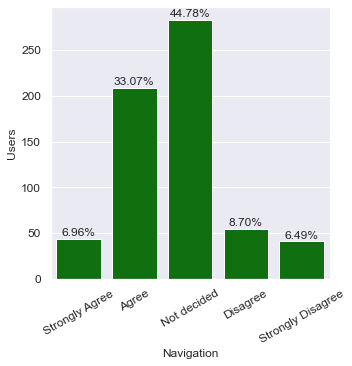

In [273]:
navigation = plot(mhealth,'Navigation',color='green',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

33% of the app users agree that the apps are easy to navigate. While only 6% strongly disagree that the apps are easy to navigate

### Aesthetics

#### The App has a good Layout?

In [274]:
mhealth['Layout'].value_counts()

3    316
2    173
4     61
5     43
1     39
Name: Layout, dtype: int64

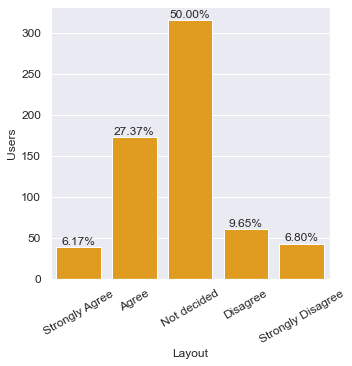

In [275]:
layout = plot(mhealth,'Layout',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

half of the app users(50%) are undecided on the layout of the apps, while over 27% of the users agree that the apps have good layout

#### The App has good Graphics?

In [276]:
mhealth['Graphics'].value_counts()

3    343
2    134
4     74
1     41
5     40
Name: Graphics, dtype: int64

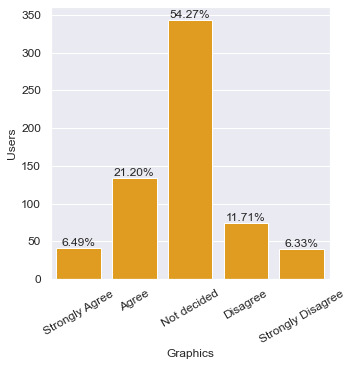

In [277]:
graphics = plot(mhealth,'Graphics',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

Over half of the app users(50%) are undecided on the graphics design of the apps. While 21% of the users agree that the apps have good graphics

#### Visual Appeal: How Good does the App look?

In [278]:
mhealth['Visual Appeal'].value_counts()

3    309
2    185
4     59
1     40
5     39
Name: Visual Appeal, dtype: int64

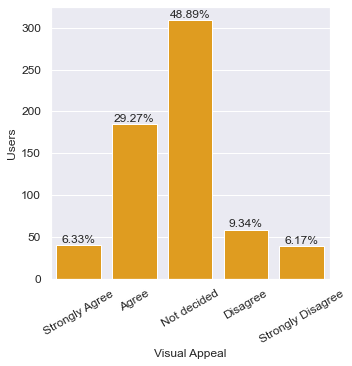

In [279]:
visual = plot(mhealth,'Visual Appeal',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

35.6%(n=225) of the app users agree that the app has a visually good appeal, while just 15.51%(n=98) thinks otherwise. The remaining 48.89%(n=309) are undecided

### Privacy, Ethics and Information

In [280]:
mhealth['Visual Information'].value_counts()

3    345
2    157
4     61
5     39
1     30
Name: Visual Information, dtype: int64

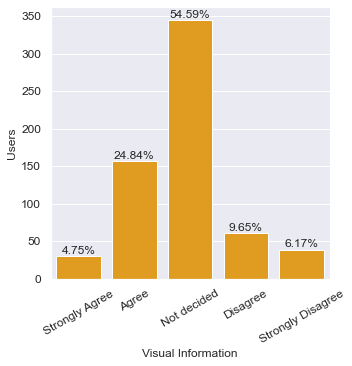

In [281]:
visual_info = plot(mhealth,'Visual Information',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

29.59%(n=187) of the app users agree that the app information is clear, while just 15.82%(n=100) thinks otherwise. The remaining 54..59%(n=345) are undecided

In [282]:
mhealth['Quality of Information'].value_counts()

3    366
2    143
4     57
5     39
1     27
Name: Quality of Information, dtype: int64

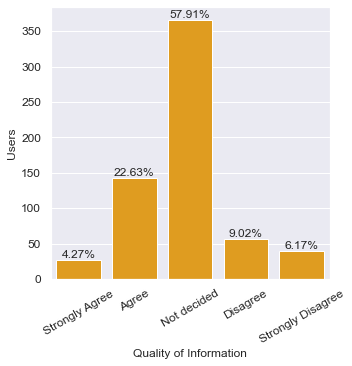

In [283]:
quality = plot(mhealth,'Quality of Information',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

26.9%(n=170) of the app users agree that the quality of information is of good standard, while 15.19%(n=96) thinks otherwise. The remaining 57.91%(n=309) are undecided

In [284]:
mhealth['Credibility'].value_counts()

3    318
2    178
4     55
1     43
5     38
Name: Credibility, dtype: int64

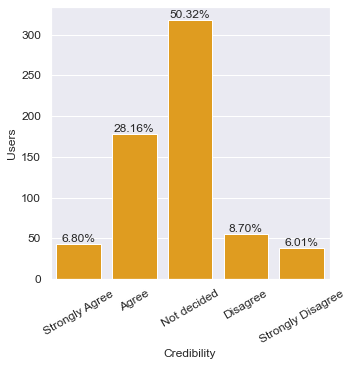

In [285]:
credibility = plot(mhealth,'Credibility',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

34.96%(n=221) of the app users agree that the app has a good credibility, while just 14.71%(n=93) thinks otherwise. The remaining 50.32%(n=318) are undecided

In [286]:
mhealth['Confidentiality and Privacy'].value_counts()

3    374
2    135
4     55
5     41
1     27
Name: Confidentiality and Privacy, dtype: int64

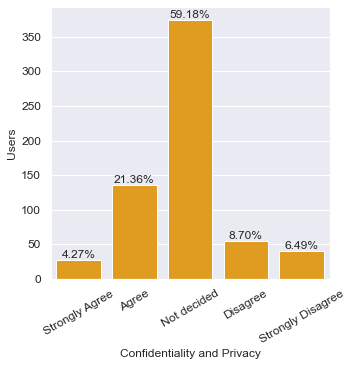

In [287]:
confidentiality = plot(mhealth,'Confidentiality and Privacy',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

25.63%(n=162) of the app users agree that the app has good confidentiality and privacy policy, while 15.19%(n=96) thinks otherwise. The remaining 59.18%(n=374) are undecided

In [288]:
mhealth['Ethical'].value_counts()

3    388
2    119
4     49
5     43
1     33
Name: Ethical, dtype: int64

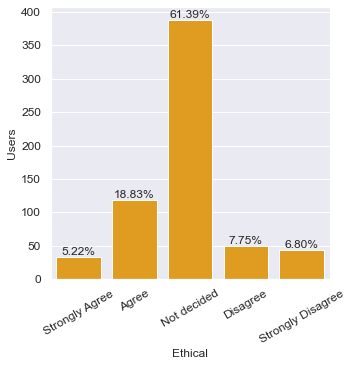

In [289]:
ethical = plot(mhealth,'Ethical',color='orange',label=('Strongly Agree','Agree','Not decided','Disagree','Strongly Disagree'),xticks=30)

24.05%(n=152) of the app users agree that the app meets the ethical policy, while just 14.55%(n=92) thinks otherwise. The remaining 61.39%(n=388) are undecided

### App Rating

In [290]:
rating= mhealth['Rating']

In [291]:
mhealth['Rating'].value_counts()

3    322
2    185
4     48
5     40
1     37
Name: Rating, dtype: int64

### Feature Engineering

#### Let us create a new feature for the app rating

In [292]:
# Rating 1 = Excellent
# Rating 2 = Good
# Rating 3 = Fair
# Rating 4 = Poor 
# Rating 5 = Very Bad

In [293]:
# define a function for the app rating
def app_rating(rating):
    if rating == 5:
        return "VERY BAD"
    elif rating == 4:
        return "POOR"
    elif rating == 3:
        return "FAIR"
    elif rating == 2:
        return "GOOD"
    else:
        return "EXCELLENT"

In [294]:
# apply this function
mhealth['New_rating'] = mhealth['Rating'].apply(app_rating)
mhealth[['Rating', 'New_rating']].head(10)

,Rating,New_rating
0,3,FAIR
1,3,FAIR
2,2,GOOD
3,3,FAIR
4,3,FAIR
5,3,FAIR
6,4,POOR
7,3,FAIR
8,4,POOR
9,3,FAIR


In [295]:
new_rating = mhealth.groupby(["Rating", "New_rating"])["New_rating"].agg(["count"]).reset_index()
new_rating

,Rating,New_rating,count
0,1,EXCELLENT,37
1,1,GOOD,0
2,1,FAIR,0
3,1,POOR,0
4,1,VERY BAD,0
5,2,EXCELLENT,0
6,2,GOOD,185
7,2,FAIR,0
8,2,POOR,0
9,2,VERY BAD,0


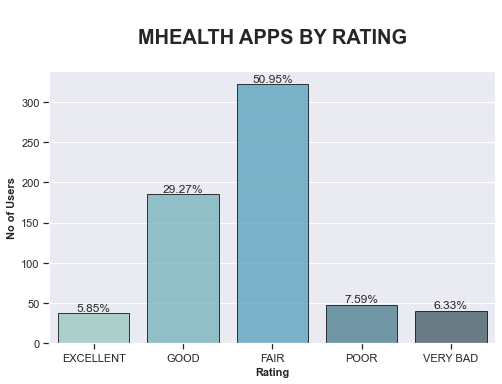

In [296]:
#Plot of App rating
sns.set_style('darkgrid')

plt.figure(figsize=(8,5))
plot = sns.countplot(x =mhealth['New_rating'], 
                                        data=mhealth, 
                                        palette = 'GnBu_d',
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nMHEALTH APPS BY RATING\n', fontsize=20,fontweight='bold')
plt.ylabel('No of Users', fontsize = 11, fontweight='bold')
plt.xlabel('Rating', fontsize = 11, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
for p in plot.patches: 
    height = p.get_height() 
    plot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format((height/len(mhealth))*100)+'%',  ha="center") 
plt.show()

Only 5.85%(n=37) of the respondents gave the apps an excellent rating(5). Majority of the respondents (50.95%,n=322) gave the apps a fair rating(3), 29.27%(n=185), 7.59%(n=48), 6.33%(n=40) rated he apps good,poor and very bad respectively

In [297]:
#import the library
from sklearn.preprocessing import LabelEncoder
#create an instance
label_encoder = LabelEncoder()

In [298]:
mhealth['New_rating'] = label_encoder.fit_transform(mhealth['New_rating'])

Text(0.5, 1.0, 'Distribution of App Rating')

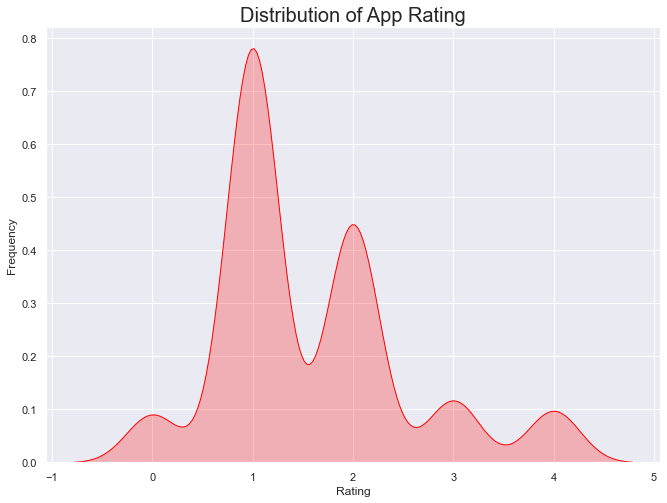

In [299]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# rating distibution 
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(mhealth.New_rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of App Rating',size = 20)

From the distribution plot, it shows that the average rating for the apps is Excellent

In [300]:
sns.set(style="darkgrid")
def rating_plot(data,x,hue,label,xticks, palette = 'GnBu_d',edgecolor='black',alpha=0.75,linewidth=1):
    plt.figure(figsize=(15,8))
    plot = sns.countplot(x=x,hue=hue,data=mhealth)
    plot.set(xlabel=x, ylabel='App Users')
    plt.title(f"Rating of Apps by {x}")
    plot.set(xticklabels=label)
    plt.legend(labels=['EXCELLENT','GOOD','FAIR','POOR','VERY BAD'])
    plt.xticks(rotation=xticks)
    for p in plot.patches: 
        height = p.get_height() 
        plot.text(p.get_x()+p.get_width()/2., 
        height + 3, 
        '{:1.2f}'.format((height/len(data))*100)+'%',  
        ha="center")
    plt.show();

posx and posy should be finite values
posx and posy should be finite values


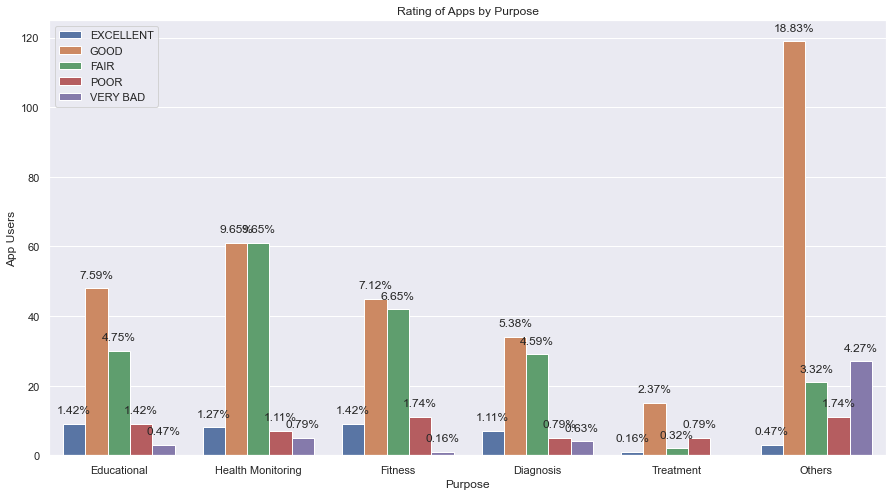

In [301]:
rating_purpose = rating_plot(mhealth,'Purpose','New_rating',label=('Educational','Health Monitoring','Fitness','Diagnosis','Treatment','Others'),xticks=0)

In [302]:
#function to build univariate plots
# sns.set(style="darkgrid")
def plot(data,var,color,label,xticks):
#     plt.figure(figsize=(10,5))
    plot = sns.countplot(x=var,data=data,color=color)
    plot.set(xlabel=var, ylabel='Users')
    for p in plot.patches: 
        height = p.get_height() 
        plot.text(p.get_x()+p.get_width()/2., 
        height + 3, 
        '{:1.2f}'.format((height/len(data))*100)+'%',  
        ha="center") 
    plot.set(xticklabels=label)
    plt.xticks(rotation=xticks)
    plt.show()


### Would You Recommend this App?

In [303]:
mhealth['Recommend App'].value_counts()

3    342
2    156
4     61
5     43
1     30
Name: Recommend App, dtype: int64

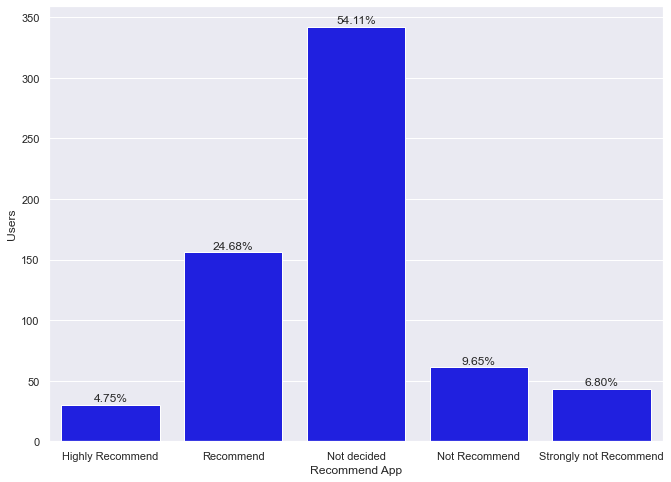

In [304]:
recommend = plot(mhealth,'Recommend App',color='blue',label=('Highly Recommend','Recommend','Not decided','Not Recommend','Strongly not Recommend'),xticks=0)

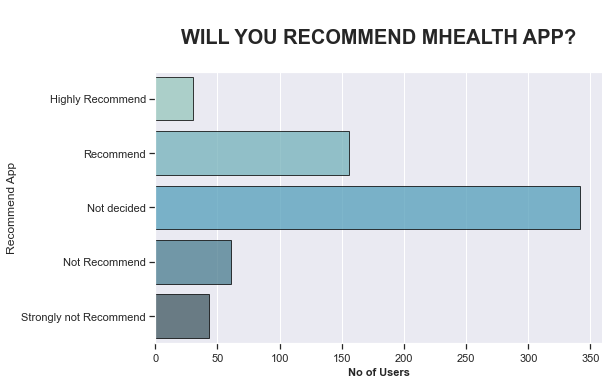

In [305]:
#recommend app
sns.set_style('darkgrid')
recommend_app_code = [1,2,3,4,5]

plt.figure(figsize=(8,5))
recommend_app = sns.countplot(y =mhealth['Recommend App'], 
                                        data=mhealth,
                                        order = recommend_app_code,
                                        palette = 'GnBu_d',
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)

recommend_app.set_yticklabels(['Highly Recommend','Recommend','Not decided','Not Recommend','Strongly not Recommend'])

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nWILL YOU RECOMMEND MHEALTH APP?\n', fontsize=20,fontweight='bold')
plt.xlabel('No of Users', fontsize = 11, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

Respondents were asked if they would recommend the apps to other potential mhealth app users and their response goes thus;
4.75%, n= 30 agreed they would strongly recommmend the apps, while 24.68%, n = 156 would also recommend but not strongly. 
Over 15% would not recommend the app, and over 50% of respondents were undecided.

### Would you Pay for this App?

In [306]:
mhealth['Pay for App'].value_counts()

3    533
2     60
1     39
Name: Pay for App, dtype: int64

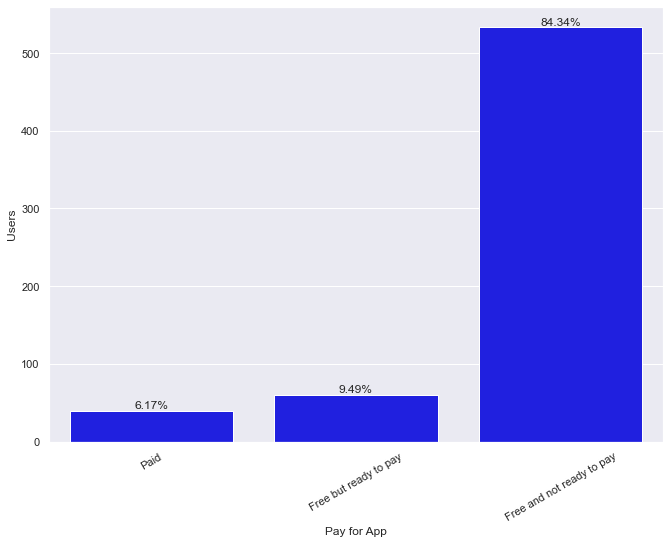

In [307]:
pay = plot(mhealth,'Pay for App',color='blue',label=('Paid','Free but ready to pay','Free and not ready to pay'),xticks=30)

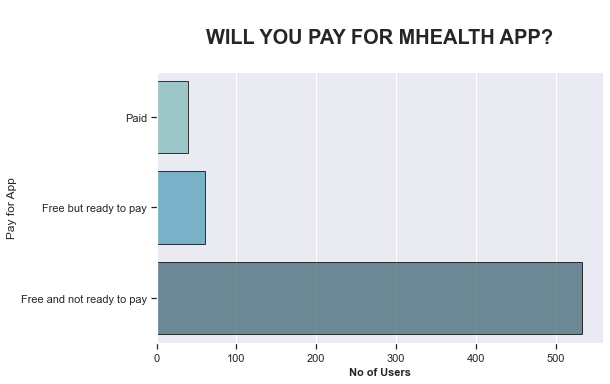

In [308]:
#pay for app
sns.set_style('darkgrid')
pay_for_app_code = [1,2,3]

plt.figure(figsize=(8,5))
pay_for_app = sns.countplot(y =mhealth['Pay for App'], 
                                        data=mhealth,
                                        order = pay_for_app_code,
                                        palette = 'GnBu_d',
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)

pay_for_app.set_yticklabels(['Paid','Free but ready to pay','Free and not ready to pay'])

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nWILL YOU PAY FOR MHEALTH APP?\n', fontsize=20,fontweight='bold')
plt.xlabel('No of Users', fontsize = 11, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

Respondents were also asked if they would pay for the app or rather download only free apps and their response goes thus; 6.17%, n= 39 stated that their apps were paid for ,9.49%, n = 60 use apps that are free but are ready to pay for the apps. Majority of the respondents stated that their app is free and they wont be paying for the app.

posx and posy should be finite values
posx and posy should be finite values


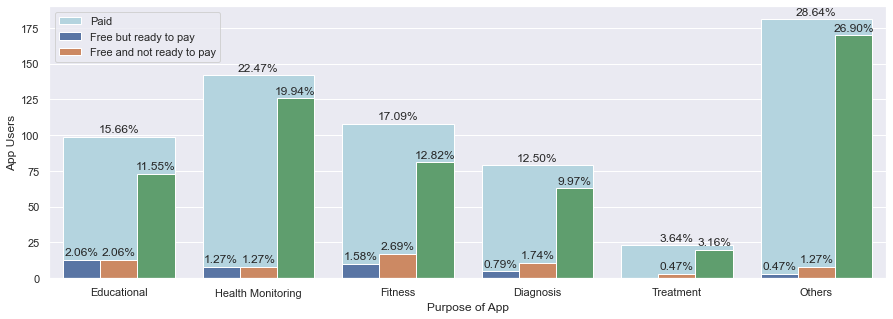

In [309]:
plt.figure(figsize=(15,5))
ses = sns.countplot(x= mhealth['Purpose'], color= 'lightblue')
sns.countplot(x= mhealth['Purpose'], hue = mhealth['Pay for App'])
ses.set(xlabel = 'Purpose of App', ylabel ='App Users', xticklabels =['Educational','Health Monitoring','Fitness','Diagnosis','Treatment','Others'])
plt.legend(labels=['Paid','Free but ready to pay','Free and not ready to pay'])

for p in ses.patches: 
    height = p.get_height() 
    ses.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(mhealth))*100)+'%',  
      ha="center")
             
plt.show()

## Convert Categorical Variables to Numerical Variables

In [310]:
#import the library
from sklearn.preprocessing import LabelEncoder
#create an instance
label_encoder = LabelEncoder()

In [311]:
mhealth['Gender'] = label_encoder.fit_transform(mhealth['Gender'])
mhealth['Age'] = label_encoder.fit_transform(mhealth['Age'])
mhealth['Age Band'] = label_encoder.fit_transform(mhealth['Age Band'])
mhealth['Prefecture'] = label_encoder.fit_transform(mhealth['Prefecture'])
mhealth['Region'] = label_encoder.fit_transform(mhealth['Region'])
mhealth['Job'] = label_encoder.fit_transform(mhealth['Job'])
mhealth['Marital Status'] = label_encoder.fit_transform(mhealth['Marital Status'])
mhealth['Kids'] = label_encoder.fit_transform(mhealth['Kids'])
mhealth['IOS'] = label_encoder.fit_transform(mhealth['IOS'])
mhealth['Android'] = label_encoder.fit_transform(mhealth['Android'])
mhealth['Windows'] = label_encoder.fit_transform(mhealth['Windows'])
mhealth['Not Downloaded'] = label_encoder.fit_transform(mhealth['Not Downloaded'])
mhealth['Purpose'] = label_encoder.fit_transform(mhealth['Purpose'])
mhealth['Interactive'] = label_encoder.fit_transform(mhealth['Interactive'])
mhealth['Entertaining'] = label_encoder.fit_transform(mhealth['Entertaining'])
mhealth['Performance'] = label_encoder.fit_transform(mhealth['Performance'])
mhealth['Ease of Use'] = label_encoder.fit_transform(mhealth['Ease of Use'])
mhealth['Navigation'] = label_encoder.fit_transform(mhealth['Navigation'])
mhealth['Layout'] = label_encoder.fit_transform(mhealth['Layout'])
mhealth['Graphics'] = label_encoder.fit_transform(mhealth['Graphics'])
mhealth['Visual Appeal'] = label_encoder.fit_transform(mhealth['Visual Appeal'])
mhealth['Visual Information'] = label_encoder.fit_transform(mhealth['Visual Information'])
mhealth['Quality of Information'] = label_encoder.fit_transform(mhealth['Quality of Information'])
mhealth['Credibility'] = label_encoder.fit_transform(mhealth['Credibility'])
mhealth['Confidentiality and Privacy'] = label_encoder.fit_transform(mhealth['Confidentiality and Privacy'])
mhealth['Ethical'] = label_encoder.fit_transform(mhealth['Ethical'])
mhealth['Rating'] = label_encoder.fit_transform(mhealth['Rating'])
mhealth['Recommend App'] = label_encoder.fit_transform(mhealth['Recommend App'])
mhealth['Pay for App'] = label_encoder.fit_transform(mhealth['Pay for App'])


We had to use Label encoder to transform non-numerical labels to numerical labels

### Are there particular category of apps (educational,health monitoring,fitness, etc.) that are more likely to be recommended by users?

In [312]:
from sklearn.cluster import KMeans

In [313]:
#segement purpose of apps and recommend app dataframe
recommend_features = mhealth[['Purpose','Recommend App']]
recommend_features.head()

,Purpose,Recommend App
0,3,2
1,3,2
2,1,1
3,1,2
4,5,2


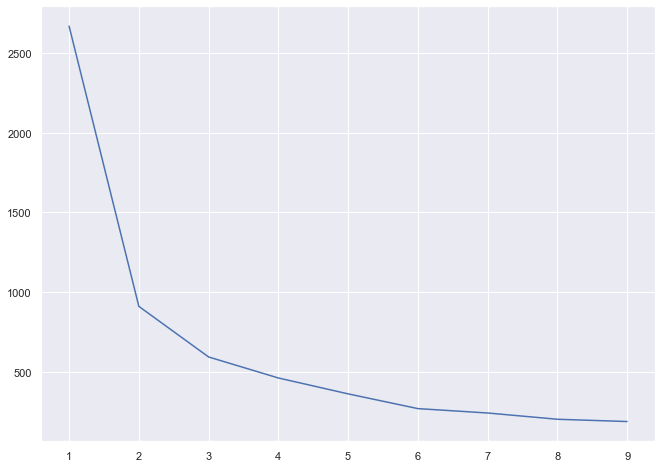

In [314]:
#to determine the best number of clusters
wcca=[]

for i in range(1,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(recommend_features)
    wcca.append(k_means.inertia_)
    
plt.figure()
plt.plot(range(1,10),wcca)
plt.show()

By using the Elbow method, the resulting number of clusters is 3, so we would apply this to the purpose of apps clustering

In [315]:
#use the number of clusters 3
kmeans =KMeans(n_clusters = 3)
kmeans.fit(recommend_features)

KMeans(n_clusters=3)

In [316]:
labels = kmeans.predict(recommend_features)
centroids = kmeans.cluster_centers_
labels

array([0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0,
       2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2,

In [317]:
centroids

array([[2.43085106, 1.69148936],
       [4.89162562, 2.22660099],
       [0.58921162, 1.76348548]])

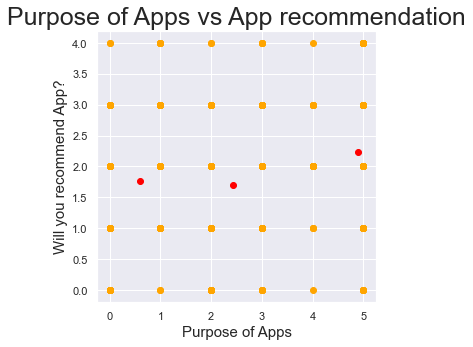

In [318]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(recommend_features['Purpose'],recommend_features['Recommend App'], color='orange')
plt.scatter(centroids[:,0],centroids[:,1], color='red')
plt.xlabel('Purpose of Apps',fontdict = {'fontsize': 15})
plt.ylabel('Will you recommend App?',fontdict = {'fontsize': 15})
plt.title('Purpose of Apps vs App recommendation', fontdict = {'fontsize' : 25})
plt.show()

We can see that the centroids are clustered around 1, 3 and 5 which means that there are more users for educational , health monitoring and treatment apps. Also, there are more users that are undecided if they would recommend the apps 

### Apriori Algorithm

In [319]:
# conda install -c conda-forge mlxtend

In [320]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [321]:
DF1=pd.get_dummies(mhealth.Purpose,prefix='Purpose of Apps')
DF2=pd.get_dummies(mhealth['Recommend App'],prefix='Recommend Apps')

In [322]:
DF_all = [DF1,DF2]
New_data = pd.concat(DF_all,axis=1)
New_data.head(10)

,Purpose of Apps_0,Purpose of Apps_1,Purpose of Apps_2,Purpose of Apps_3,Purpose of Apps_4,Purpose of Apps_5,Recommend Apps_0,Recommend Apps_1,Recommend Apps_2,Recommend Apps_3,Recommend Apps_4
0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0,0,1,0,0


In [323]:
apriori(New_data,min_support=0.4,use_colnames=True)

,support,itemsets
0,0.541139,(Recommend Apps_2)


In [324]:
frequent_itemset = apriori(New_data,min_support = 0.4, use_colnames =True)
association_rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### Are there particular category of apps (educational,health monitoring,fitness, etc.) that are more likely to be paid for by users?

In [325]:
#segement purpose of apps and pay for app dataframe
pay_features = mhealth[['Purpose','Pay for App']]
pay_features.head()

,Purpose,Pay for App
0,3,2
1,3,2
2,1,2
3,1,2
4,5,2


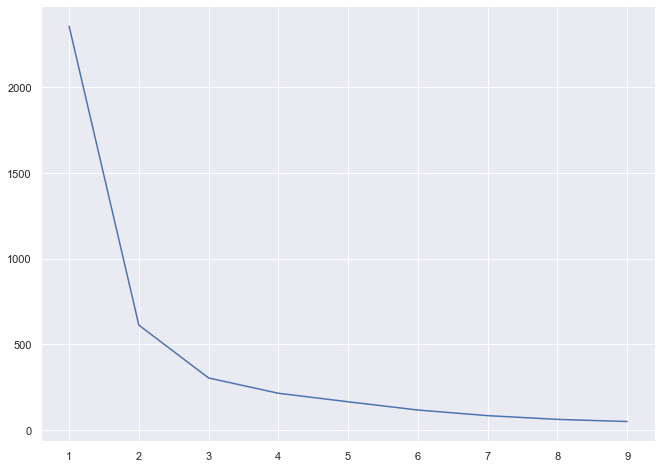

In [326]:
#to determine the best number of clusters
wcca1=[]

for i in range(1,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(pay_features)
    wcca1.append(k_means.inertia_)
    
plt.figure()
plt.plot(range(1,10),wcca1)
plt.show()

By using the Elbow method, the resulting number of clusters is 3, so we would apply this to the purpose of apps clustering

In [327]:
#use the number of clusters 3
kmeans =KMeans(n_clusters = 3)
kmeans.fit(pay_features)

KMeans(n_clusters=3)

In [328]:
labels = kmeans.predict(pay_features)
centroids = kmeans.cluster_centers_
labels

array([1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1,
       2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0,
       1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2,

In [329]:
centroids

array([[4.8872549 , 1.91666667],
       [2.42245989, 1.68983957],
       [0.58921162, 1.73858921]])

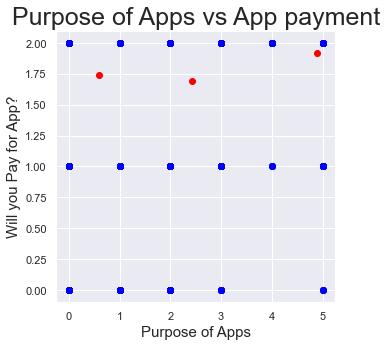

In [330]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(pay_features['Purpose'],pay_features['Pay for App'], color='blue')
plt.scatter(centroids[:,0],centroids[:,1], color='red')
plt.xlabel('Purpose of Apps',fontdict = {'fontsize': 15})
plt.ylabel('Will you Pay for App?',fontdict = {'fontsize': 15})
plt.title('Purpose of Apps vs App payment', fontdict = {'fontsize' : 25})
plt.show()

We can see that the centroids are clustered around 1, 3 and 5 which means that there are more users for educational , fitness and treatment apps. Also, there are more users that are not ready to pay for the apps.

### Apriori  Algorithm

In [331]:
a=pd.get_dummies(mhealth.Purpose,prefix='Purpose of Apps')
b=pd.get_dummies(mhealth['Pay for App'],prefix='Pay for Apps')

In [332]:
DF_ab = [a,b]
New_dataframe = pd.concat(DF_ab,axis=1)
New_dataframe.head(10)

,Purpose of Apps_0,Purpose of Apps_1,Purpose of Apps_2,Purpose of Apps_3,Purpose of Apps_4,Purpose of Apps_5,Pay for Apps_0,Pay for Apps_1,Pay for Apps_2
0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1
5,0,1,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,1


In [333]:
freq_itemsets = apriori(New_dataframe,min_support=0.2,use_colnames=True)

In [334]:
freq_itemsets

,support,itemsets
0,0.224684,(Purpose of Apps_1)
1,0.286392,(Purpose of Apps_5)
2,0.843354,(Pay for Apps_2)
3,0.268987,"(Purpose of Apps_5, Pay for Apps_2)"


In [335]:
# assoc_rule = association_rules(freq_itemsets, metric='lift', min_threshold=0.7)
# assoc_rule

## Feature Selection

### Prediction of Demographic Features that Influence the Recommendation of Apps

In [336]:
#import the libraries
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

In [337]:
#specify the targets
predictors = ['Gender','Age Band','Prefecture','Region','Job','Marital Status','Kids']

In [338]:
Mhealth = mhealth.filter(['Gender','Age Band','Prefecture','Region','Job','Marital Status','Kids','Recommend App'],axis=1)
Mhealth.head(5)

,Gender,Age Band,Prefecture,Region,Job,Marital Status,Kids,Recommend App
0,1,4,13,2,7,1,0,2
1,0,5,12,2,5,1,0,2
2,1,4,12,2,8,1,0,1
3,1,5,26,4,3,0,1,2
4,0,5,21,3,1,0,0,2


Now let's see what the top N conditions are for our target variable(i.e recommend app)

In [339]:
#chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [340]:
#perform feature selection
selector = SelectKBest(f_classif, k='all')
selector.fit(Mhealth[predictors], Mhealth['Recommend App'])

SelectKBest(k='all')

In [341]:
#we will now get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

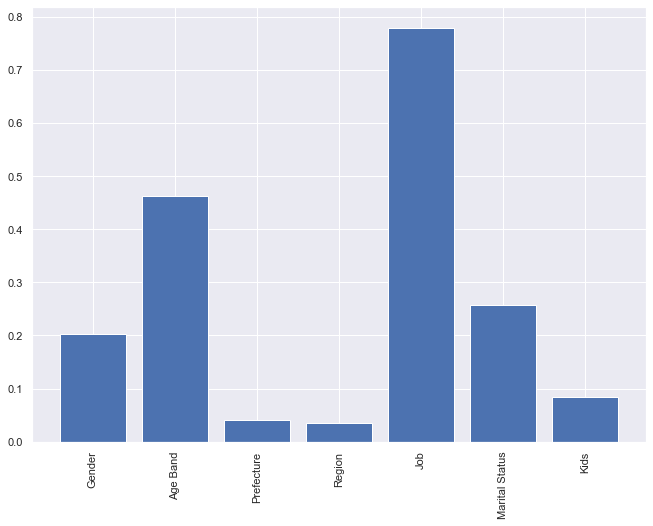

In [342]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

The above shows that Job is the main factor out of all the  demographic features considered, closely followed by Age band of the users, and then Marital Status

### Prediction of User experience features that Influence the Recommendation of Apps

In [343]:
#specify the targets
predictors1 = ['Interactive','Entertaining','Performance','Ease of Use','Navigation','Layout','Visual Appeal','Graphics','Visual Information','Quality of Information','Credibility','Confidentiality and Privacy','Ethical','Rating']

In [344]:
Mhealth1 = mhealth.filter(['Interactive','Entertaining','Performance','Ease of Use','Navigation','Layout','Visual Appeal','Graphics','Visual Information','Quality of Information','Credibility','Confidentiality and Privacy','Ethical','Rating','Recommend App'],axis=1)
Mhealth1.head(5)

,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Visual Appeal,Graphics,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App
0,2,3,3,3,1,2,2,3,2,2,3,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,3,1,2,1,1,1,1,1,1,1,1,2,2,1,1
3,2,2,2,1,1,1,1,2,1,3,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Now let's see what the top N conditions are for our target variable(i.e recommend app)

In [345]:
#perform feature selection
selector1 = SelectKBest(f_classif, k='all')
selector1.fit(Mhealth1[predictors1], Mhealth1['Recommend App'])

SelectKBest(k='all')

In [346]:
#we will now get the p-values for each feature and then transform from p-values into some scores
scores1 = -np.log10(selector1.pvalues_)

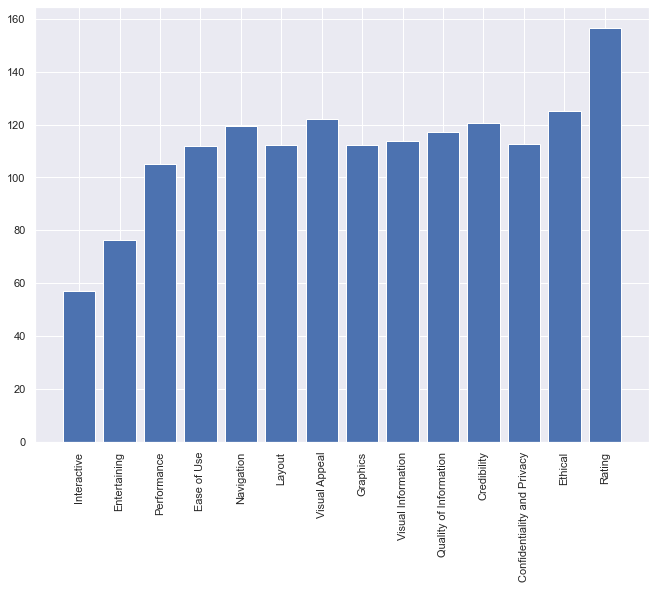

In [347]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors1)), scores1)
plt.xticks(range(len(predictors1)), predictors1, rotation='vertical')
plt.show()

The above shows that rating is the main factor out of all the user experience features considered, closely followed by ethical and then visual appeal and credibility of the apps.

## Modelling

### Build a Model to Predict App Ratings and determine the most important Feature in choosing an App

In [348]:
mhealth.drop('New_rating',inplace=True,axis=1)

In [349]:
#save the data as csv
mhealth.to_csv('mhealth_new.csv',index=False)

In [350]:
mhealth_new = pd.read_csv('mhealth_new.csv')

In [351]:
mhealth_new.head(5)

,App ID,Gender,Age,Age Band,Prefecture,Region,Job,Marital Status,Kids,IOS,Android,Windows,Not Downloaded,Purpose,Interactive,Entertaining,Performance,Ease of Use,Navigation,Layout,Graphics,Visual Appeal,Visual Information,Quality of Information,Credibility,Confidentiality and Privacy,Ethical,Rating,Recommend App,Pay for App
0,1000002570,1,38,4,13,2,7,1,0,0,1,0,0,3,2,3,3,3,1,2,3,2,2,2,3,2,2,2,2,2
1,1000003695,0,46,5,12,2,5,1,0,0,0,1,0,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1000004117,1,36,4,12,2,8,1,0,0,1,0,0,1,3,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2
3,1000008551,1,42,5,26,4,3,0,1,1,0,0,0,1,2,2,2,1,1,1,2,1,1,3,2,2,2,2,2,2
4,1000009247,0,55,5,21,3,1,0,0,1,0,0,0,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [352]:
# target = mhealth_new['New_rating']
# features = mhealth_new.drop(target)

Inspecting the target variable....

In [353]:
mhealth['Rating'].value_counts()

2    322
1    185
3     48
4     40
0     37
Name: Rating, dtype: int64

Class=2, n=322 (50.949%)
Class=1, n=185 (29.272%)
Class=3, n=48 (7.595%)
Class=4, n=40 (6.329%)
Class=0, n=37 (5.854%)


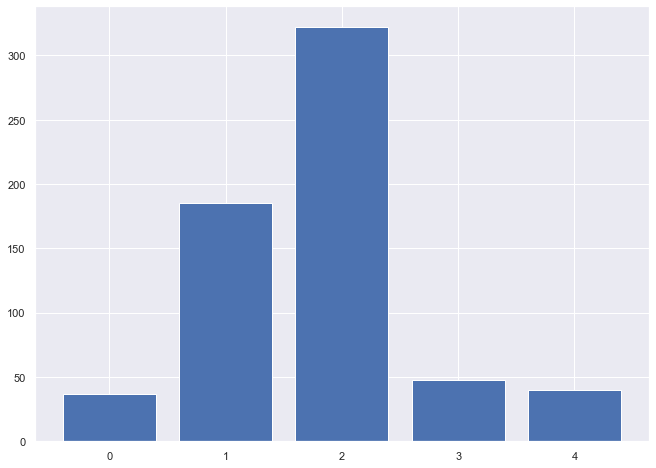

In [354]:
X =mhealth_new.drop('Rating',axis=1).values
y =  mhealth_new['Rating'].values

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

just by a quick inspection of the counts of the number of the classes in the target variable tells us that there is quite a large skew in target as shown in the figure

Now let us try and oversample the target class

Class=2, n=322 (20.000%)
Class=1, n=322 (20.000%)
Class=3, n=322 (20.000%)
Class=4, n=322 (20.000%)
Class=0, n=322 (20.000%)


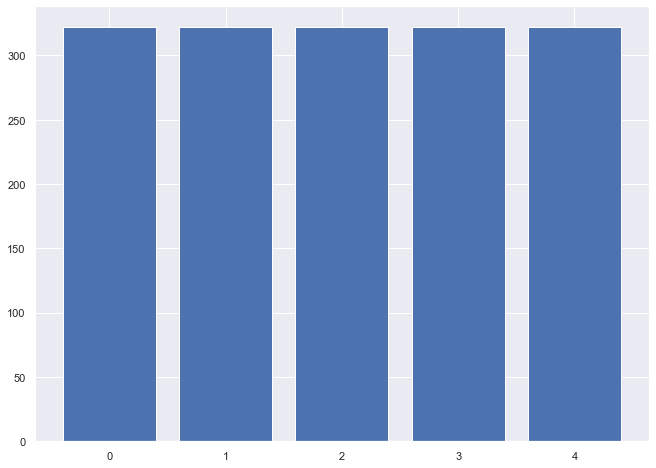

In [355]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we have oversampled the minority class to solve the problem of imbalance

In [356]:
# mhealth_new['New_rating'] = label_encoder.fit_transform(mhealth_new['New_rating'])

Now, lets build our model

In [357]:
#create a function that will split the data into training and test sets, and normalize the data
def get_data(target):

#get the features and the target
    features = mhealth_new.drop(target,axis=1).values
    label = mhealth_new[target].values
#split the data
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)
#normalize the data
    scaler=MinMaxScaler()
    x_train_scaler= scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    return x_train_scaler,x_test_scaler,y_train,y_test



In [358]:
#calling the function
x_train_scaler,x_test_scaler,y_train,y_test = get_data('Rating')

In [359]:
#check the shape of the data
x_train_scaler.shape,x_test_scaler.shape,y_train.shape,y_test.shape

((505, 29), (127, 29), (505,), (127,))

In [360]:
#function to model the data
def modelling(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train_scaler,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train_scaler,y_train)
    test_acc = model.score(x_test_scaler,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

## Random Forest Classifier

In [361]:
#calling the function to model the data
rf_train,rf_test = modelling(RandomForestClassifier())

In [362]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(rf_train))
print("Test Accuracy:{:.3f}".format(rf_test))

Train Accuracy:1.000
Test Accuracy:0.772


The random foret model overfits, in other words the training accuracy is more than the test accuracy. We would have to perform hyperparameter tuning to improve the performance

In [363]:
rf1_train,rf1_test = modelling(RandomForestClassifier(  n_jobs= -1,n_estimators = 1500, max_features = 0.3, max_depth = 2, min_samples_leaf = 2, random_state = 0, verbose = 0))

In [364]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(rf1_train))
print("Test Accuracy:{:.3f}".format(rf1_test))

Train Accuracy:0.788
Test Accuracy:0.772


After tuning the model with a maximum depth of 2, number of estimators of 1500 ansd also setting a random state for reproducibility, the model performed better, even though it still slightly overfits

We would have to use other metrics to judge the performance of the model

### Model Prediction

In [365]:
#fucntion for model prediction 
def model_predict(model):
    Y_pred = model.predict(x_test_scaler)
    return Y_pred

In [366]:
# #create an instance of the model
rf= RandomForestClassifier(  n_jobs= -1,n_estimators = 1000, max_features = 0.3, max_depth = 3, min_samples_leaf = 2, random_state = 0, verbose = 0)
# #fit the model
rf.fit(x_train_scaler,y_train)

#make predictions on the test data
rf_pred = model_predict(rf)

In [367]:
rf_pred

array([3, 1, 2, 1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 2, 3, 2, 1, 0, 2, 1, 4, 2,
       4, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 3, 0, 1, 1, 4, 2, 1, 2,
       1, 2, 2, 4, 4, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 1, 2, 4, 2, 1, 2, 2, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 3, 1], dtype=int64)

### Performance Metrics for Random Forest Classifier

In [368]:
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_pred))
print('Random Forest Precision: ', precision_score(y_test, rf_pred,average='weighted'))
print('Random Forest Recall: ', recall_score(y_test, rf_pred,average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, rf_pred,average='weighted'))

Confusion Matrix: 
 [[ 4  4  0  0  0]
 [ 1 23 11  0  0]
 [ 0  4 59  2  1]
 [ 0  0  1  7  1]
 [ 0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.74      0.66      0.70        35
           2       0.83      0.89      0.86        66
           3       0.70      0.78      0.74         9
           4       0.80      0.89      0.84         9

    accuracy                           0.80       127
   macro avg       0.77      0.74      0.75       127
weighted avg       0.79      0.80      0.79       127

Random Forest Accuracy:  0.7952755905511811
Random Forest Precision:  0.7930142705355833
Random Forest Recall:  0.7952755905511811
Random Forest F1 Score:  0.790348487884039


Accuracy - The random forest model had an accuracy of 79%

Recall - out of all the app users(respondents), the model predicted the rating of 86% of users with a rating of either Excellent, Good, Fair,Poor or very Bad

Precision - out of all the app users(respondents) predicted ratings ,the model correctly predicted 86% of the different ratings


Let us examine the features and rank them in order of importance

### Feature Importance

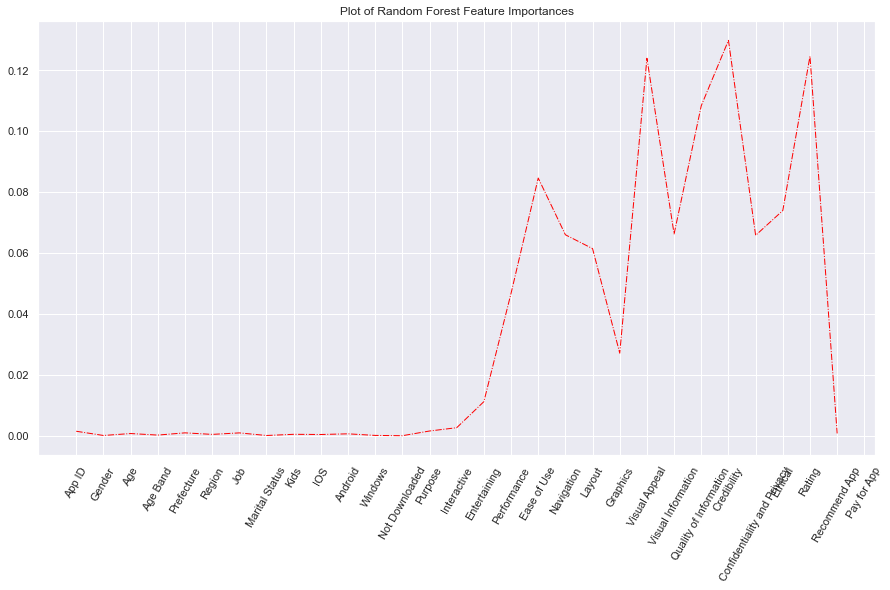

In [369]:
plt.figure(figsize=(15,8))
plt.plot(rf.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(mhealth_new.shape[1]),mhealth_new,rotation=60)
plt.title("Plot of Random Forest Feature Importances")
plt.show()

Based on the feature importance plot above, it appears that the most important features considered by the random forest model are the Quality of information, then followed by the Visual Appeal and Ratings. Next on the list is the Ease of use

Now let us build another ensemble model, to compare with the random forest model

### Gradient Boosting Model

In [370]:
gb_train,gb_test = modelling(GradientBoostingClassifier())

In [371]:
#getting the accuracies
gb_train,gb_test

(0.998019801980198, 0.7795275590551181)

The Gradient boosting model also overfits like the random forest, so we would tune for better performance

In [372]:
gb1_train,gb1_test = modelling(GradientBoostingClassifier( n_estimators= 1500, max_features = 0.9, max_depth = 3, min_samples_leaf = 2, random_state = 0, verbose = 0))

In [373]:
gb1_train,gb1_test

(1.0, 0.7559055118110236)

After tuning the model with a maximum depth of 3, number of estimators of 1500 ansd also setting a random state for reproducibility, the model did not perform better, it still overfits

Now let us look at other metrics for evaluation

In [374]:
#create an instance of the model
gb = GradientBoostingClassifier(n_estimators= 1500, max_features = 0.9, max_depth = 3, min_samples_leaf = 2, random_state = 0, verbose = 0)
# #fit the model
gb.fit(x_train_scaler,y_train)

# #make predictions on the test data by calling the model-predict function
gb_pred = model_predict(gb)

In [375]:
gb_pred

array([3, 1, 1, 0, 3, 2, 2, 1, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 1, 4, 2,
       4, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 3, 0, 1, 1, 4, 2, 1, 2,
       2, 2, 2, 4, 4, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 4, 2, 4, 2,
       2, 2, 3, 4, 2, 1, 2, 2, 3, 2, 1, 2, 4, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1], dtype=int64)

### Performance Metrics for Gradient Boosting Model

In [376]:
print('Confusion Matrix: \n',confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print('Gradient Boosting Accuracy: ', accuracy_score(y_test, gb_pred))
print('Gradient Boost Precision: ', precision_score(y_test, rf_pred,average='weighted'))
print('Gradient Boost Recall: ', recall_score(y_test, gb_pred,average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, gb_pred,average='weighted'))

Confusion Matrix: 
 [[ 4  4  0  0  0]
 [ 2 23 10  0  0]
 [ 0  7 54  4  1]
 [ 0  0  1  7  1]
 [ 0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.68      0.66      0.67        35
           2       0.83      0.82      0.82        66
           3       0.58      0.78      0.67         9
           4       0.80      0.89      0.84         9

    accuracy                           0.76       127
   macro avg       0.71      0.73      0.71       127
weighted avg       0.76      0.76      0.76       127

Gradient Boosting Accuracy:  0.7559055118110236
Gradient Boost Precision:  0.7930142705355833
Gradient Boost Recall:  0.7559055118110236
Gradient Boost F1 Score:  0.7550860079814249


Accuracy - The gradient model had an accuracy of 79%

Recall - out of all the app users(respondents), the model predicted the rating of 79% of users with a rating of either Excellent, Good, Fair,Poor or very Bad 

Precision - out of all the app users(respondents) predicted ratings ,the model correctly predicted 86% of the different ratings

Let us examine the features and rank them in order of importance

### Feature Importance

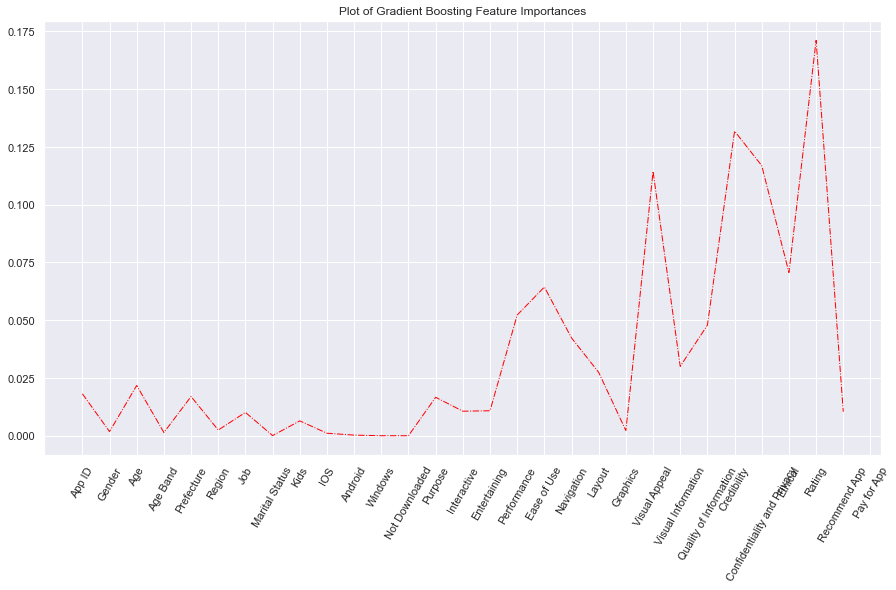

In [377]:
plt.figure(figsize=(15,8))
plt.plot(gb.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(mhealth_new.shape[1]),mhealth_new,rotation=60)
plt.title("Plot of Gradient Boosting Feature Importances")
plt.show()

Based on the feature importance plot above, it appears that the most important features considered by the gradient boost model are the Ratings, then followed by the Quality of information and Visual appeal. Next on the list is the Confidentiality and privacy and Ease of use

### Decision Tree Model

In [378]:
d_train,d_test = modelling(DecisionTreeClassifier())

In [379]:
#getting the accuracies
d_train,d_test

(1.0, 0.6929133858267716)

The Decision Tree model also overfits like the random forest and gradient boost models, so we would tune for better performance

In [380]:
d_train,d_test = modelling(DecisionTreeClassifier(max_depth=2))

In [381]:
#getting the accuracies
d_train,d_test

(0.7465346534653465, 0.7007874015748031)

The decision tree model overfits, so we had to tunr the model by performing hyperparameter tuning. We had to set a max_depth of 2. The model now generlaised very well, as the training accuracy is equal to the test accuracy

Now let us look at other metrics for evaluation

In [382]:
#create an instance of the model
d_tree = DecisionTreeClassifier(max_depth=2,random_state = 0)
# #fit the model
d_tree.fit(x_train_scaler,y_train)

# #make predictions on the test data by calling the model-predict function
d_pred = model_predict(d_tree)

In [383]:
d_pred

array([3, 1, 1, 0, 3, 3, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 0, 1, 1, 3, 2,
       3, 1, 2, 3, 1, 2, 2, 1, 2, 3, 3, 0, 1, 2, 3, 0, 1, 1, 3, 2, 1, 1,
       1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 3, 1], dtype=int64)

### Performance Metrics for Decision Tree Model

In [384]:
print('Confusion Matrix: \n',confusion_matrix(y_test,d_pred))
print(classification_report(y_test,d_pred))
print('Decision Tree Accuracy: ', accuracy_score(y_test, d_pred))
print('Decision Tree Precision: ', precision_score(y_test, d_pred,average='weighted'))
print('Decision Tree Recall: ', recall_score(y_test, d_pred,average='weighted'))
print('Decision Tree F1 Score: ', f1_score(y_test, d_pred,average='weighted'))

Confusion Matrix: 
 [[ 3  5  0  0  0]
 [ 3 23  9  0  0]
 [ 0  7 54  5  0]
 [ 0  0  0  9  0]
 [ 0  0  0  9  0]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.66      0.66      0.66        35
           2       0.86      0.82      0.84        66
           3       0.39      1.00      0.56         9
           4       0.00      0.00      0.00         9

    accuracy                           0.70       127
   macro avg       0.48      0.57      0.50       127
weighted avg       0.69      0.70      0.68       127

Decision Tree Accuracy:  0.7007874015748031
Decision Tree Precision:  0.68577297403042
Decision Tree Recall:  0.7007874015748031
Decision Tree F1 Score:  0.6830463415910221


Accuracy - The decision tree model had an accuracy of 73%

Recall - out of all the app users(respondents), the model predicted the rating of 73% of users with a rating of either Excellent, Good, Fair,Poor or very Bad

Precision - out of all the app users(respondents) predicted ratings ,the model correctly predicted 73% of the different ratings

Let us examine the features and rank them in order of importance

### Feature Importance

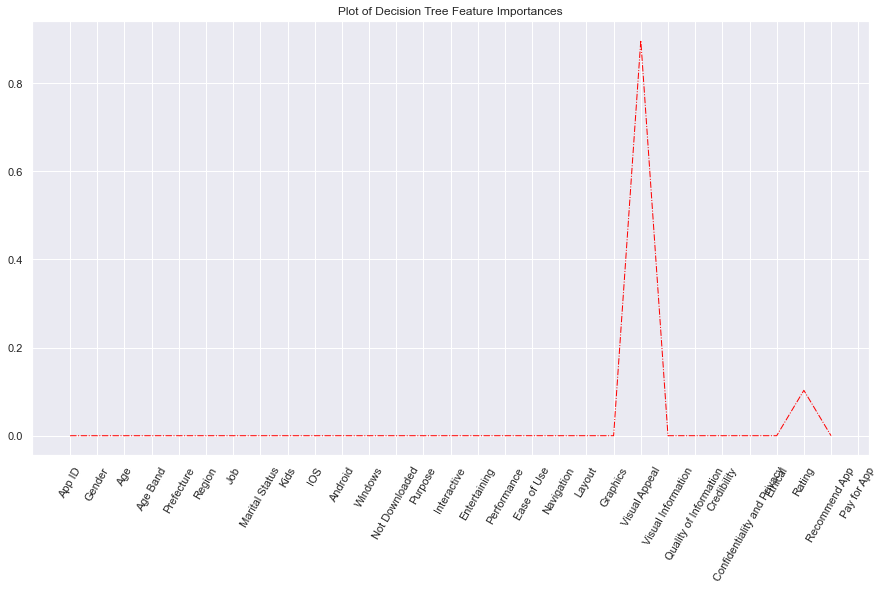

In [385]:
plt.figure(figsize=(15,8))
plt.plot(d_tree.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(mhealth_new.shape[1]),mhealth_new,rotation=60)
plt.title("Plot of Decision Tree Feature Importances")
plt.show()

Based on the feature importance plot above, it appears that the most important features considered by the decision tree model are the Ratings, then followed by the Quality of information.

### Receiver Operating Characteristics(ROC) and Area Under the Curve(AUC)

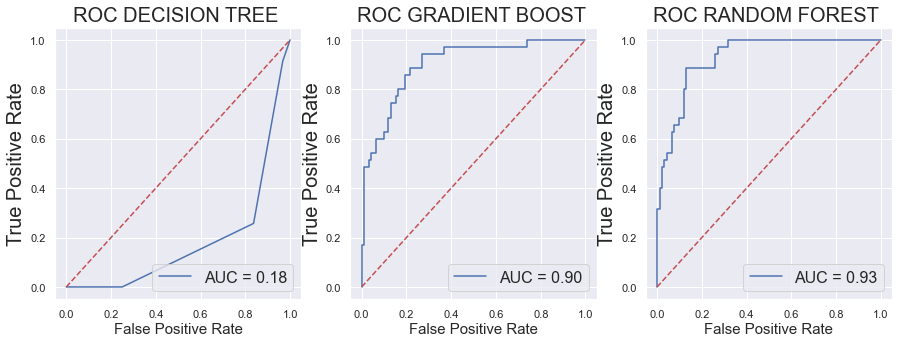

In [389]:
#AUC-ROC GRAPHS FOR MODELS

# DECISION TREE AUC-ROC
fig, (ax, ax1,ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
# fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
y_pred = d_tree.predict(x_test_scaler)
fprdtr, tprdtr, thresholddtr = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_aucdtr = metrics.auc(fprdtr, tprdtr)

ax.plot(fprdtr, tprdtr, 'b', label = 'AUC = %0.2f' % roc_aucdtr)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('ROC DECISION TREE ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})



#GRADIENT BOOSTING CLASSIFIER
probs = gb.predict_proba(x_test_scaler)
preds = probs[:,1]
fprgb, tprgb, thresholdgb = metrics.roc_curve(y_test, preds, pos_label=1)
roc_aucgb = metrics.auc(fprgb, tprgb)

ax1.plot(fprgb, tprgb, 'b', label = 'AUC = %0.2f' % roc_aucgb)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('ROC GRADIENT BOOST ',fontsize=20)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST CLASSIFIER
probs = rf.predict_proba(x_test_scaler)
preds = probs[:,1]
fprrf, tprrf, thresholdrf = metrics.roc_curve(y_test, preds, pos_label=1)
roc_aucrf = metrics.auc(fprrf, tprrf)

ax2.plot(fprrf, tprrf, 'b', label = 'AUC = %0.2f' % roc_aucrf)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('ROC RANDOM FOREST ',fontsize=20)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})



#ALL PLOTS 
#ax_arr[1,2].plot(fprNN, tprNN, 'b', label = 'NeuralNetwork', color='black')
ax_arr[1,2].plot(fprdtr, tprdtr, 'b', label = 'Decision Tree', color='grey')
# ax_arr[1,2].plot(fprDTC, tprDTC, 'b', label = 'Decision Tree', color='blue')
# ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrf, tprrf, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprgb, tprgb, 'b', label = 'Gradient Boost', color='blue')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=0.2)

# plt.subplots_adjust(wspace=0.2)
# plt.tight_layout() 

Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.
The closer the AUC is to 1, the more excellent it is for prediction. In other words, the greater the AUC, the more accurate our model is at predicting.
A look at the figure above shows that Random forest had a better performance than the other models with an AUC of 0.95.This is closely followed by gradient boost model.

### Model Comparison

In [390]:
df = {'Models': ["Random Forest","Gradient Boost","Decision Tree"],
        "Accuracy": [86, 79,73],
        "Precision": [86,86,72],
        "Recall": [86,79,73],
        "F1-score": [86,79,72]
        }
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,86,86,86,86
1,Gradient Boost,79,86,79,79
2,Decision Tree,73,72,73,72


# Build a Model to Predict if Users will Pay for an App

Class=2, n=533 (84.335%)
Class=1, n=60 (9.494%)
Class=0, n=39 (6.171%)


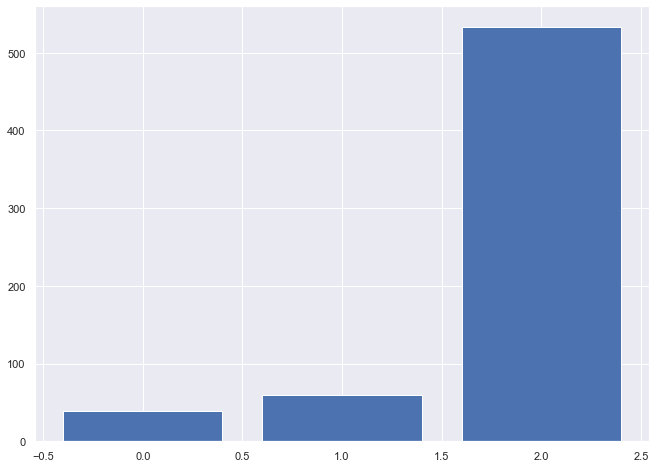

In [391]:
X =mhealth_new.drop('Pay for App',axis=1).values
y =  mhealth_new['Pay for App'].values

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

just by a quick inspection of the counts of the number of the classes in the target variable tells us that there is quite a large skew in target as shown in the figure

Now we will oversample the target class

Class=2, n=533 (33.333%)
Class=1, n=533 (33.333%)
Class=0, n=533 (33.333%)


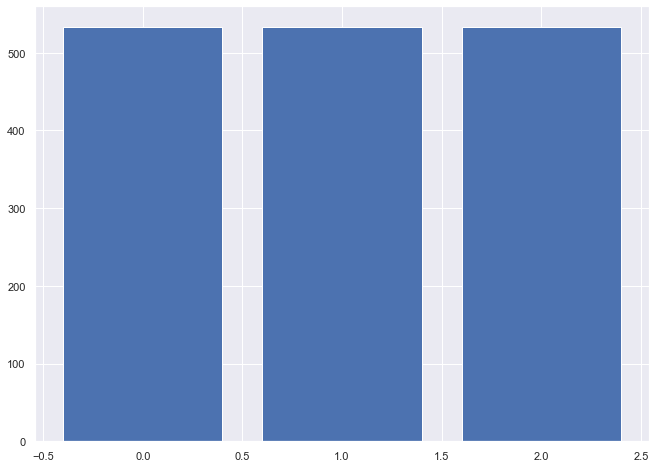

In [392]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we have oversampled the minority class to solve the problem of imbalance

Model building...

In [393]:
#calling the function to split the data and normalize the data
#calling the function
x_train_scaler,x_test_scaler,y_train,y_test = get_data('Pay for App')

In [394]:
#check the shape of the data
x_train_scaler.shape,x_test_scaler.shape,y_train.shape,y_test.shape

((505, 29), (127, 29), (505,), (127,))

## Logistic Regression Model

In [395]:
#calling the function
logreg_train,logreg_test = modelling(LogisticRegression())

In [396]:
logreg_train,logreg_test

(0.8594059405940594, 0.8976377952755905)

The Logistic Regression model generalises very well with an accuracy of 90%.

### Model Prediction

In [397]:
#create an instance of the model
logreg = LogisticRegression(C=0.5,penalty="l1",solver="liblinear")

#fit the model
logreg.fit(x_train_scaler,y_train)

#make predictions on the test data
logreg_pred = logreg.predict(x_test_scaler)



### PERFORMANCE METRICS FOR LOGISTIC REGRESSION

In [398]:
print('Confusion Matrix: \n',confusion_matrix(y_test,logreg_pred))
print(classification_report(y_test,logreg_pred))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, logreg_pred))
print('Logistic Regression Precision: ', precision_score(y_test, logreg_pred,average='weighted'))
print('Logistic Regression Recall: ', recall_score(y_test, logreg_pred,average='weighted'))
print('Logistic Regression F1 Score: ', f1_score(y_test, logreg_pred,average='weighted'))

Confusion Matrix: 
 [[  0   1   7]
 [  0   0   5]
 [  0   0 114]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         5
           2       0.90      1.00      0.95       114

    accuracy                           0.90       127
   macro avg       0.30      0.33      0.32       127
weighted avg       0.81      0.90      0.85       127

Logistic Regression Accuracy:  0.8976377952755905
Logistic Regression Precision:  0.81214848143982
Logistic Regression Recall:  0.8976377952755905
Logistic Regression F1 Score:  0.8527559055118111


Accuracy - The logistic regression model had an accuracy of 58%

Recall - out of all the app users(respondents), the model predicted that 58% of users will recommend the apps

Precision - out of all the prediction,the model predicted correctly that 34% of the users will recommend the apps

## Naive Bayes Model

In [399]:
#calling the function
nb_train,nb_test = modelling(GaussianNB())

In [400]:
nb_train,nb_test

(0.6217821782178218, 0.6141732283464567)

The Naive Bayes model slightly overfits. We would have to perform model tuning for better performance

### Model Prediction

In [401]:
#create an instance of the model
nb = GaussianNB()

#fit the model
nb.fit(x_train_scaler,y_train)

#make predictions on the test data
nb_pred = nb.predict(x_test_scaler)



### PERFORMANCE METRICS FOR NAIVE BAYES MODEL

In [402]:
print('Confusion Matrix: \n',confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
print('Naive Bayes Accuracy: ', accuracy_score(y_test, nb_pred))
print('Naive Bayes Precision: ', precision_score(y_test, nb_pred,average='weighted'))
print('Naive Bayes Recall: ', recall_score(y_test, nb_pred,average='weighted'))
print('Naive Bayes F1 Score: ', f1_score(y_test, nb_pred,average='weighted'))

Confusion Matrix: 
 [[ 5  0  3]
 [ 3  0  2]
 [41  0 73]]
              precision    recall  f1-score   support

           0       0.10      0.62      0.18         8
           1       0.00      0.00      0.00         5
           2       0.94      0.64      0.76       114

    accuracy                           0.61       127
   macro avg       0.35      0.42      0.31       127
weighted avg       0.85      0.61      0.69       127

Naive Bayes Accuracy:  0.6141732283464567
Naive Bayes Precision:  0.8465246789206294
Naive Bayes Recall:  0.6141732283464567
Naive Bayes F1 Score:  0.6936299903301562


Accuracy - The naive bayes model had an accuracy of 50%

Recall - out of all the app users(respondents), the model predicted that half(50%) of the users will recommend the apps

Precision - out of all the prediction,the model predicted correctly that 43% of the users will recommend the apps

## K-NEAREST NEIGHBOR MODEL(K-NN)

In [403]:
#calling the function
knn_train,knn_test = modelling(KNeighborsClassifier())

In [404]:
knn_train,knn_test

(0.8693069306930693, 0.8818897637795275)

The K-NN model had a very good acuracy and generalised very well with a test accuracy of 88%

### Model Prediction

In [405]:
#create an instance of the model
knn = KNeighborsClassifier()

#fit the model
knn.fit(x_train_scaler,y_train)

#make predictions on the test data
knn_pred = knn.predict(x_test_scaler)



### PERFORMANCE METRICS FOR KNN MODEL

In [406]:
print('Confusion Matrix: \n',confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print('K-NN Accuracy: ', accuracy_score(y_test, knn_pred))
print('K-NN Precision: ', precision_score(y_test, knn_pred,average='weighted'))
print('K-NN Recall: ', recall_score(y_test, knn_pred,average='weighted'))
print('K-NN F1 Score: ', f1_score(y_test, knn_pred,average='weighted'))

Confusion Matrix: 
 [[  1   1   6]
 [  0   0   5]
 [  0   3 111]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.00      0.00      0.00         5
           2       0.91      0.97      0.94       114

    accuracy                           0.88       127
   macro avg       0.64      0.37      0.39       127
weighted avg       0.88      0.88      0.86       127

K-NN Accuracy:  0.8818897637795275
K-NN Precision:  0.8796953659481089
K-NN Recall:  0.8818897637795275
K-NN F1 Score:  0.8583863457745748


Accuracy - The K-nn model had an accuracy of 59%

Recall - out of all the app users(respondents), the model predicted that 59% of users will recommend the apps

Precision - out of all the prediction,the model predicted correctly that 45% of the users will recommend the apps

## Decision Tree Model

In [407]:
#calling the function
dec_train,dec_test = modelling(DecisionTreeClassifier())

In [408]:
dec_train,dec_test

(1.0, 0.8188976377952756)

The model overfits, so we would have to tune the model for better performance

In [409]:
dec_train,dec_test = modelling(DecisionTreeClassifier(max_depth=2))

In [410]:
dec_train,dec_test

(0.8297029702970297, 0.8976377952755905)

After fine tuning the decision tree classifier by specifying a max depth of 2, the model generalises well

### Model Prediction

In [411]:
#create an instance of the model
dec = DecisionTreeClassifier()

#fit the model
dec.fit(x_train_scaler,y_train)

#make predictions on the test data
dec_pred = dec.predict(x_test_scaler)

### PERFORMANCE METRICS FOR DECISION TREE MODEL

In [412]:
print('Confusion Matrix: \n',confusion_matrix(y_test,dec_pred))
print(classification_report(y_test,dec_pred))
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, dec_pred))
print('Decision Tree Precision: ', precision_score(y_test, dec_pred,average='weighted'))
print('Decision Tree Recall: ', recall_score(y_test, dec_pred,average='weighted'))
print('Decision Tree F1 Score: ', f1_score(y_test, dec_pred,average='weighted'))

Confusion Matrix: 
 [[  1   0   7]
 [  0   2   3]
 [  3   6 105]]
              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.25      0.40      0.31         5
           2       0.91      0.92      0.92       114

    accuracy                           0.85       127
   macro avg       0.47      0.48      0.46       127
weighted avg       0.85      0.85      0.85       127

Decision Tree Model Accuracy:  0.8503937007874016
Decision Tree Precision:  0.8451728859979458
Decision Tree Recall:  0.8503937007874016
Decision Tree F1 Score:  0.8457738550232446


Accuracy - The decision tree model had an accuracy of 60%

Recall - out of all the app users(respondents), the model predicted that 60% of users will pay for the apps

Precision - out of all the prediction,the model predicted correctly that 46% of the users will pay for the apps

### Receiver Operating Characteristics(ROC) and Area Under the Curve(AUC)

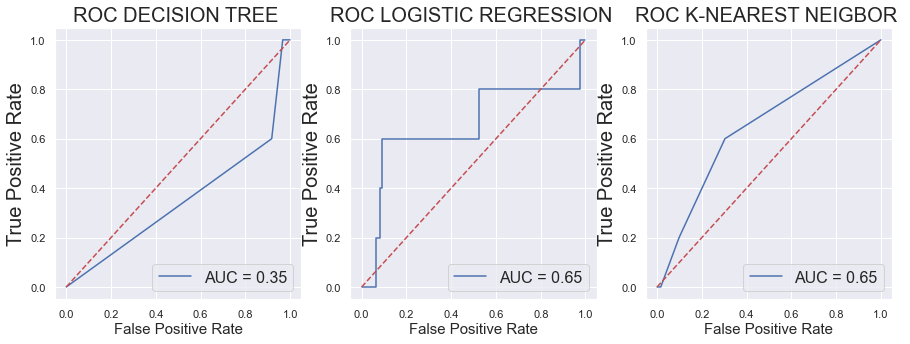

In [413]:
#AUC-ROC GRAPHS FOR MODELS

# DECISION TREE AUC-ROC
fig, (ax, ax1,ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
# fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
y_pred = dec.predict(x_test_scaler)
fprdtr1, tprdtr1, thresholddtr1 = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_aucdtr1 = metrics.auc(fprdtr1, tprdtr1)

ax.plot(fprdtr1, tprdtr1, 'b', label = 'AUC = %0.2f' % roc_aucdtr1)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('ROC DECISION TREE ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})



#LOGISTIC REGRESSION CLASSIFIER
probs = logreg.predict_proba(x_test_scaler)
preds = probs[:,1]
fprlogreg, tprlogreg, thresholdlogreg = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auclogreg = metrics.auc(fprlogreg, tprlogreg)

ax1.plot(fprlogreg, tprlogreg, 'b', label = 'AUC = %0.2f' % roc_auclogreg)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('ROC LOGISTIC REGRESSION ',fontsize=20)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})


#K-NEAREST NEIGHBOUR CLASSIFIER
probs = knn.predict_proba(x_test_scaler)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds, pos_label=1)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax2.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('ROC K-NEAREST NEIGBOR ',fontsize=20)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})



#NAIVE BAYES CLASSIFIER
probs = nb.predict_proba(x_test_scaler)
preds = probs[:,1]
fprnb, tprnb, thresholddnb = metrics.roc_curve(y_test, preds,pos_label=1)
roc_aucnb = metrics.auc(fprnb, tprnb)

ax_arr[1,0].plot(fprnb, tprnb, 'b', label = 'AUC = %0.2f' % roc_aucnb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC NAIVE BAYES ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


# #ALL PLOTS 
# #ax_arr[1,2].plot(fprNN, tprNN, 'b', label = 'NeuralNetwork', color='black')
# ax_arr[1,2].plot(fprdtr, tprdtr, 'b', label = 'Decision Tree', color='grey')
# # ax_arr[1,2].plot(fprDTC, tprDTC, 'b', label = 'Decision Tree', color='blue')
# # ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
# ax_arr[1,2].plot(fprrf, tprrf, 'b', label = 'Random Forest', color='green')
# ax_arr[1,2].plot(fprgb, tprgb, 'b', label = 'Gradient Boost', color='blue')
# ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
# ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
# ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
# ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=0.2)

# plt.subplots_adjust(wspace=0.2)
# plt.tight_layout() 

A look at the figure above shows that Logistic regression model had a better performance than the other models with an AUC of 0.80.This is closely followed by K-NN model.

### Model Comparison

In [414]:
df1 = {'Models': ["Logistic Regression","Naive Bayes","K-Nearest Neigbour","Decision Tree"],
        "Accuracy": [58, 50,59,60],
        "Precision": [34,43,45,46],
        "Recall": [58,50,59,60],
        "F1-score": [43,48,46,50]
        }
model_comparison1 = pd.DataFrame(data = df1)

# display the table of performance comparison
model_comparison1

,Models,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,58,34,58,43
1,Naive Bayes,50,43,50,48
2,K-Nearest Neigbour,59,45,59,46
3,Decision Tree,60,46,60,50


# Build a Model to Predict if Users will Recommend an App

Class=2, n=342 (54.114%)
Class=1, n=156 (24.684%)
Class=3, n=61 (9.652%)
Class=4, n=43 (6.804%)
Class=0, n=30 (4.747%)


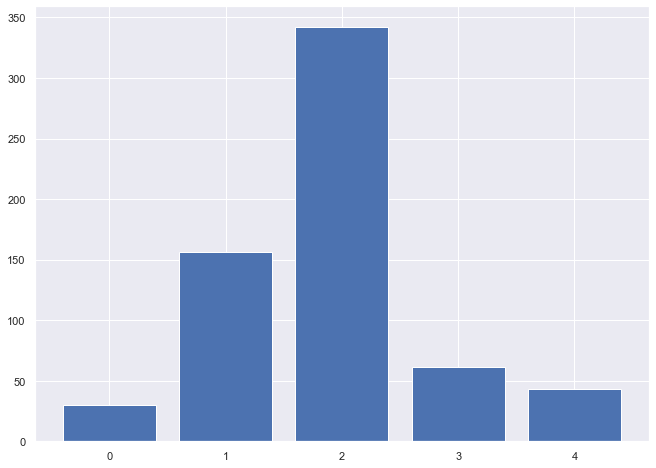

In [415]:
X =mhealth_new.drop('Recommend App',axis=1).values
y =  mhealth_new['Recommend App'].values

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

just by a quick inspection of the counts of the number of the classes in the target variable tells us that there is quite a large skew in target as shown in the figure

Now we will oversample the target class

Class=2, n=342 (20.000%)
Class=1, n=342 (20.000%)
Class=3, n=342 (20.000%)
Class=4, n=342 (20.000%)
Class=0, n=342 (20.000%)


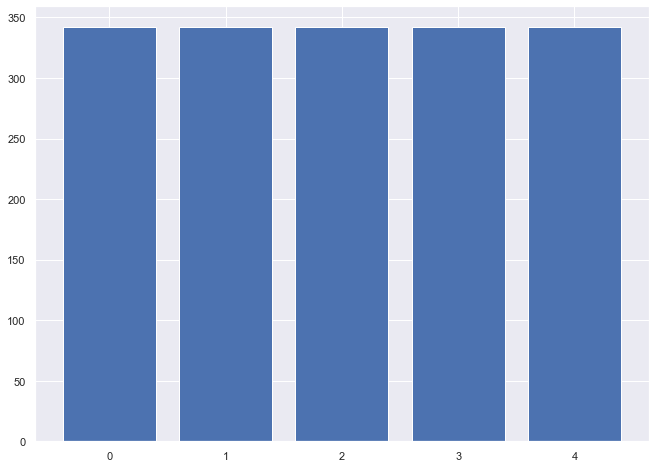

In [416]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we have oversampled the minority class to solve the problem of imbalance

Model building...

In [417]:
#calling the function to split the data and normalize the data
x_train_scaler,x_test_scaler,y_train,y_test = get_data('Recommend App')

In [418]:
#check the shape of the data
x_train_scaler.shape,x_test_scaler.shape,y_train.shape,y_test.shape

((505, 29), (127, 29), (505,), (127,))

## Logistic Regression Model

In [419]:
#calling the function
logreg1_train,logreg1_test = modelling(LogisticRegression())

In [420]:
logreg1_train,logreg1_test

(0.7782178217821782, 0.7795275590551181)

The logistic regression model generalises very well, with a testing accuracy of 78%

### Model Prediction

In [421]:
#create an instance of the model
logreg1 = LogisticRegression(C=0.5,penalty="l1",solver="liblinear")

#fit the model
logreg1.fit(x_train_scaler,y_train)

#make predictions on the test data
logreg1_pred = logreg1.predict(x_test_scaler)

### PERFORMANCE METRICS FOR LOGISTIC REGRESSION

In [422]:
print('Confusion Matrix: \n',confusion_matrix(y_test,logreg1_pred))
print(classification_report(y_test,logreg1_pred))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, logreg1_pred))
print('Logistic Regression Precision: ', precision_score(y_test, logreg1_pred,average='weighted'))
print('Logistic Regression Recall: ', recall_score(y_test, logreg1_pred,average='weighted'))
print('Logistic Regression F1 Score: ', f1_score(y_test, logreg1_pred,average='weighted'))

Confusion Matrix: 
 [[ 0  4  2  0  0]
 [ 0  6 19  0  0]
 [ 0  1 73  0  0]
 [ 0  0 12  0  1]
 [ 0  0  1  0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.55      0.24      0.33        25
           2       0.68      0.99      0.81        74
           3       0.00      0.00      0.00        13
           4       0.89      0.89      0.89         9

    accuracy                           0.69       127
   macro avg       0.42      0.42      0.41       127
weighted avg       0.57      0.69      0.60       127

Logistic Regression Accuracy:  0.6850393700787402
Logistic Regression Precision:  0.5678924798801169
Logistic Regression Recall:  0.6850393700787402
Logistic Regression F1 Score:  0.5986137091979523


Accuracy - The logistic regression model had an accuracy of 69%

Recall - out of all the app users(respondents), the model predicted that 69% of users will pay for the apps

Precision - out of all the prediction,the model predicted correctly that 57% of the users will pay for the apps

## Naive Bayes Model

In [423]:
#calling the function
nb1_train,nb1_test = modelling(GaussianNB())

In [424]:
nb1_train,nb1_test

(0.6712871287128713, 0.6377952755905512)

The Naive Bayes model slightly overfits. We would have to perform model tuning for better performance

### Model Prediction

In [425]:
#create an instance of the model
nb1 = GaussianNB()

#fit the model
nb1.fit(x_train_scaler,y_train)

#make predictions on the test data
nb1_pred = nb1.predict(x_test_scaler)


### PERFORMANCE METRICS FOR NAIVE BAYES MODEL

In [426]:
print('Confusion Matrix: \n',confusion_matrix(y_test,nb1_pred))
print(classification_report(y_test,nb1_pred))
print('Naive Bayes Model Accuracy: ', accuracy_score(y_test, nb1_pred))
print('Naive Bayes Precision: ', precision_score(y_test, nb1_pred,average='weighted'))
print('Naive Bayes Recall: ', recall_score(y_test, nb1_pred,average='weighted'))
print('Naive Bayes F1 Score: ', f1_score(y_test, nb1_pred,average='weighted'))

Confusion Matrix: 
 [[ 5  1  0  0  0]
 [16  8  0  1  0]
 [ 2  8 58  5  1]
 [ 0  0  3  2  8]
 [ 0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.22      0.83      0.34         6
           1       0.47      0.32      0.38        25
           2       0.95      0.78      0.86        74
           3       0.22      0.15      0.18        13
           4       0.47      0.89      0.62         9

    accuracy                           0.64       127
   macro avg       0.47      0.60      0.48       127
weighted avg       0.71      0.64      0.65       127

Naive Bayes Model Accuracy:  0.6377952755905512
Naive Bayes Precision:  0.7130227752179588
Naive Bayes Recall:  0.6377952755905512
Naive Bayes F1 Score:  0.6541736860498739


Accuracy - The naive bayes model had an accuracy of 64%

Recall - out of all the app users(respondents), the model predicted that 64% of users will pay for the apps

Precision - out of all the prediction,the model predicted correctly that 71% of the users will pay for the apps

## K-NEAREST NEIGHBOR MODEL(K-NN)

In [427]:
#calling the function
knn1_train,knn1_test = modelling(KNeighborsClassifier())

In [428]:
knn1_train,knn1_test

(0.7881188118811882, 0.7480314960629921)

The k-nn model overfits

### Model Prediction

In [429]:
#create an instance of the model
knn1 = KNeighborsClassifier()

#fit the model
knn1.fit(x_train_scaler,y_train)

#make predictions on the test data
knn1_pred = knn1.predict(x_test_scaler)

### PERFORMANCE METRICS FOR KNN MODEL

In [430]:
print('Confusion Matrix: \n',confusion_matrix(y_test,knn1_pred))
print(classification_report(y_test,knn1_pred))
print('K-NN Model Accuracy: ', accuracy_score(y_test, knn1_pred))
print('K-NN Precision: ', precision_score(y_test, knn1_pred,average='weighted'))
print('K-NN Recall: ', recall_score(y_test, knn1_pred,average='weighted'))
print('K-NN F1 Score: ', f1_score(y_test, knn1_pred,average='weighted'))

Confusion Matrix: 
 [[ 1  4  1  0  0]
 [ 0 15 10  0  0]
 [ 0  6 67  0  1]
 [ 0  0  8  4  1]
 [ 0  0  1  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.60      0.60      0.60        25
           2       0.77      0.91      0.83        74
           3       1.00      0.31      0.47        13
           4       0.80      0.89      0.84         9

    accuracy                           0.75       127
   macro avg       0.83      0.57      0.61       127
weighted avg       0.77      0.75      0.72       127

K-NN Model Accuracy:  0.7480314960629921
K-NN Precision:  0.7731378405285545
K-NN Recall:  0.7480314960629921
K-NN F1 Score:  0.7244168681364688


Accuracy - The K-NN model had an accuracy of 69%

Recall - out of all the app users(respondents), the model predicted that 75% of users will pay for the apps

Precision - out of all the prediction,the model predicted correctly that 77% of the users will pay for the apps

## DECISION TREE MODEL

In [431]:
#calling the function
dec1_train,dec1_test = modelling(DecisionTreeClassifier())

In [432]:
dec1_train,dec1_test

(1.0, 0.7244094488188977)

The decision tree model greatly overfits, we would have to carry out model tuning for better performance

In [433]:
#calling the function
dec1_train,dec1_test = modelling(DecisionTreeClassifier(max_depth=2))

In [434]:
dec1_train,dec1_test

(0.7326732673267327, 0.7322834645669292)

After tuning the model by setting a max depth of 2, the model generakised well, as the training accuracy equalled the test accuracy

### Model Prediction

In [435]:
#create an instance of the model
dec1 = DecisionTreeClassifier()

#fit the model
dec1.fit(x_train_scaler,y_train)

#make predictions on the test data
dec1_pred = dec1.predict(x_test_scaler)

### PERFORMANCE METRICS FOR DECISION TREE MODEL

In [436]:
print('Confusion Matrix: \n',confusion_matrix(y_test,dec1_pred))
print(classification_report(y_test,dec1_pred))
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, dec1_pred))
print('Decision Tree Precision: ', precision_score(y_test, dec1_pred,average='weighted'))
print('Decision Tree Recall: ', recall_score(y_test, dec1_pred,average='weighted'))
print('Decision Tree F1 Score: ', f1_score(y_test, dec1_pred,average='weighted'))

Confusion Matrix: 
 [[ 3  2  0  1  0]
 [ 3 18  4  0  0]
 [ 2  8 57  6  1]
 [ 0  0  4  7  2]
 [ 0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.64      0.72      0.68        25
           2       0.88      0.77      0.82        74
           3       0.47      0.54      0.50        13
           4       0.73      0.89      0.80         9

    accuracy                           0.73       127
   macro avg       0.62      0.68      0.65       127
weighted avg       0.75      0.73      0.74       127

Decision Tree Model Accuracy:  0.7322834645669292
Decision Tree Precision:  0.7545343108335234
Decision Tree Recall:  0.7322834645669292
Decision Tree F1 Score:  0.7397103002276745


Accuracy - The decision tree model had an accuracy of 72%

Recall - out of all the app users(respondents), the model predicted that 72% of users will pay for the apps

Precision - out of all the prediction,the model predicted correctly that 75% of the users will pay for the apps

### Receiver Operating Characteristics(ROC) and Area Under the Curve(AUC)

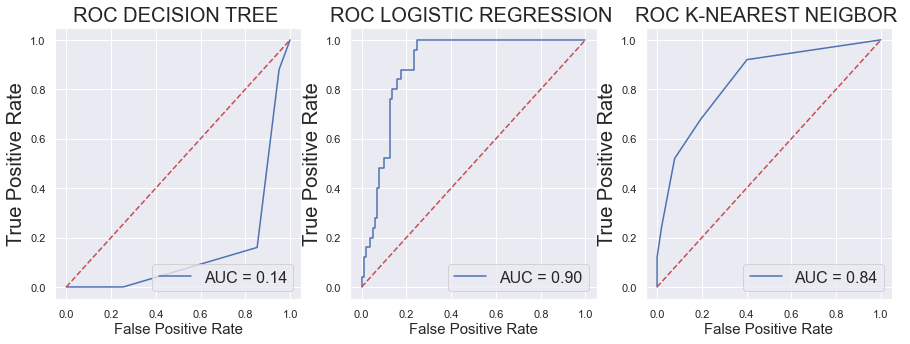

In [437]:
#AUC-ROC GRAPHS FOR MODELS

# DECISION TREE AUC-ROC
fig, (ax, ax1,ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
# fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
y_pred = dec1.predict(x_test_scaler)
fprdtr2, tprdtr2, thresholddtr2 = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_aucdtr2 = metrics.auc(fprdtr2, tprdtr2)

ax.plot(fprdtr2, tprdtr2, 'b', label = 'AUC = %0.2f' % roc_aucdtr2)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('ROC DECISION TREE ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})



#LOGISTIC REGRESSION CLASSIFIER
probs = logreg1.predict_proba(x_test_scaler)
preds = probs[:,1]
fprlogreg1, tprlogreg1, thresholdlogreg1 = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auclogreg1 = metrics.auc(fprlogreg1, tprlogreg1)

ax1.plot(fprlogreg1, tprlogreg1, 'b', label = 'AUC = %0.2f' % roc_auclogreg1)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('ROC LOGISTIC REGRESSION ',fontsize=20)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

#K-NEAREST NEIGHBOUR CLASSIFIER
probs = knn1.predict_proba(x_test_scaler)
preds = probs[:,1]
fprknn1, tprknn1, thresholdknn1 = metrics.roc_curve(y_test, preds, pos_label=1)
roc_aucknn1 = metrics.auc(fprknn1, tprknn1)

ax2.plot(fprknn1, tprknn1, 'b', label = 'AUC = %0.2f' % roc_aucknn1)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('ROC K-NEAREST NEIGBOR ',fontsize=20)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})


#NAIVE BAYES CLASSIFIER
probs = nb1.predict_proba(x_test_scaler)
preds = probs[:,1]
fprnb1, tprnb1, thresholddnb1 = metrics.roc_curve(y_test, preds,pos_label=1)
roc_aucnb1 = metrics.auc(fprnb1, tprnb1)

ax_arr[1,0].plot(fprnb1, tprnb1, 'b', label = 'AUC = %0.2f' % roc_aucnb1)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC NAIVE BAYES ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


# #ALL PLOTS 
# #ax_arr[1,2].plot(fprNN, tprNN, 'b', label = 'NeuralNetwork', color='black')
# ax_arr[1,2].plot(fprdtr, tprdtr, 'b', label = 'Decision Tree', color='grey')
# # ax_arr[1,2].plot(fprDTC, tprDTC, 'b', label = 'Decision Tree', color='blue')
# # ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
# ax_arr[1,2].plot(fprrf, tprrf, 'b', label = 'Random Forest', color='green')
# ax_arr[1,2].plot(fprgb, tprgb, 'b', label = 'Gradient Boost', color='blue')
# ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
# ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
# ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
# ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=0.2)

# plt.subplots_adjust(wspace=0.2)
# plt.tight_layout() 

A look at the figure above shows that Logistic regression model had a better performance than the other models with an AUC of 0.90.This is closely followed by K-NN model.

### Model Comparison

In [438]:
df2 = {'Models': ["Logistic Regression","Naive Bayes","K-Nearest Neigbour","Decision Tree"],
        "Accuracy": [69, 64,75,72],
        "Precision": [57, 71,77,75],
        "Recall": [69,64,75,72],
        "F1-score": [60,65,72,73]
        }
model_comparison2 = pd.DataFrame(data = df2)

# display the table of performance comparison
model_comparison2

,Models,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,69,57,69,60
1,Naive Bayes,64,71,64,65
2,K-Nearest Neigbour,75,77,75,72
3,Decision Tree,72,75,72,73


## Conclusion

The goal of this project is to identify the factors that affects the choice of an app, and also to build a predictive model to predict the ratings of apps and also to predict if the users will recommend and pay for the apps. We built different classification models such as Logistic regression model, K-Nearest Neighbor model, Decision tree model, and Naive Bayes model. We also built different tree based models such as Random forest and Gradient Boost models. The models were bult with a balanced dataset. Based on the model comparisons, the Decision Tree model had the best accuracy, precision, recall and f1-score for the prediction of users paying for the app. The K-Nearest neighbor had the highest accuracy, precision, recall and F1-score of 75%, 77%, 75% and 72% respectively for the prediction of users recommending the apps. Also, for the tree based models to predict app rating, Random Forest model had the best performance of 86% across all metrics.
Conclusively, the most important factors that affects the selection of an app includes the app ratings, how appealing the visuals are (visual appeal) and the quality of information.